In [41]:
import pandas as pd
import os
from PIL import Image
from IPython.display import display
import base64
from io import BytesIO
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem


In [42]:
# 读取CSV文件
df = pd.read_csv('lig_descriptor_with_images.csv')
print(f"总共有 {len(df)} 个配合物结构")
print("\nCSV文件的列名：")
print(df.columns.tolist())
print("\n前两行数据：")
print(df.head(2))


总共有 42 个配合物结构

CSV文件的列名：
['name', 'lig_ligand_homo', 'lig_ligand_homo_minus_1', 'lig_ligand_lumo', 'lig_ligand_lumo_plus_1', 'lig_ligand_hl_gap', 'lig_ligand_fermi_level', 'lig_ligand_energy', 'lig_ligand_IP_shift', 'lig_ligand_IP', 'lig_ligand_EA_shift', 'lig_ligand_EA', 'lig_ligand_GEI', 'lig_ligand_f_plus_atom_0', 'lig_ligand_f_minus_atom_0', 'lig_ligand_f_zero_atom_0', 'lig_ligand_mulliken_atom_0', 'lig_ligand_cm5_atom_0', 'lig_ligand_f_plus_atom_1', 'lig_ligand_f_minus_atom_1', 'lig_ligand_f_zero_atom_1', 'lig_ligand_mulliken_atom_1', 'lig_ligand_cm5_atom_1', 'lig_ligand_atom_num', 'lig_ligand_weight', 'lig_ligand_farthest_distance', 'lig_ligand_mol_radius', 'lig_ligand_mol_size_short', 'lig_ligand_mol_size_2', 'lig_ligand_mol_size_l', 'lig_ligand_length_ratio', 'lig_ligand_len_div_diameter', 'lig_ligand_mpp', 'lig_ligand_sdp', 'lig_ligand_dipole_moment', 'lig_ligand_quadrupole_moment', 'lig_ligand_octopole_moment', 'lig_morfeus_area', 'lig_morfeus_volume', 'lig_morfeus_p_int', 'l

In [43]:
# 检查第一个结构的数据格式
print("图片数据的前100个字符：")
print(df.iloc[0]['structure_image'][:100])
print("\n图片数据的长度：", len(df.iloc[0]['structure_image']))


图片数据的前100个字符：
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQV

图片数据的长度： 17986


In [44]:
def display_molecule_structure(base64_string):
    try:
        # 解码base64字符串
        binary_data = base64.b64decode(base64_string)
        
        # 尝试从二进制数据创建分子对象
        mol = Chem.MolFromMolBlock(binary_data.decode('utf-8'))
        
        if mol is None:
            print("无法从数据创建分子对象")
            return
            
        # 生成3D构象
        AllChem.EmbedMolecule(mol, randomSeed=42)
        AllChem.MMFFOptimizeMolecule(mol)
        
        # 创建分子的2D图像
        img = Draw.MolToImage(mol, size=(400, 400))
        display(img)
        
    except Exception as e:
        print(f"处理分子结构时出错: {str(e)}")
        
# 测试第一个分子的显示
print("显示第一个分子的结构：")
display_molecule_structure(df.iloc[0]['structure_image'])


显示第一个分子的结构：
处理分子结构时出错: Incorrect padding


In [45]:
def display_molecule_structure_alt(base64_string):
    try:
        # 解码base64字符串
        binary_data = base64.b64decode(base64_string)
        
        # 尝试直接从二进制数据创建图像
        img = Image.open(BytesIO(binary_data))
        
        # 显示图像
        display(img)
        
    except Exception as e:
        print(f"处理分子结构时出错: {str(e)}")
        
# 测试第一个分子的显示（使用替代方法）
print("使用替代方法显示第一个分子的结构：")
display_molecule_structure_alt(df.iloc[0]['structure_image'])


使用替代方法显示第一个分子的结构：
处理分子结构时出错: Incorrect padding


In [46]:
# 显示前5个分子的结构
print("显示前5个分子的结构：")
for i in range(5):
    print(f"\n分子 {i+1}:")
    print(f"名称: {df.iloc[i]['name']}")
    display_molecule_structure_alt(df.iloc[i]['structure_image'])  # 使用效果更好的方法


显示前5个分子的结构：

分子 1:
名称: frame_1_13-bis-trifluoromethyl-benzene_6_butane_0_SINGLE_benzene_0_3
处理分子结构时出错: Incorrect padding

分子 2:
名称: frame_1_13-bis-trifluoromethyl-benzene_6_ethane_0_SINGLE_azane_0_0
处理分子结构时出错: Incorrect padding

分子 3:
名称: frame_1_1H-pyrrole_0_benzene_0_SINGLE_azane_0_6
处理分子结构时出错: Incorrect padding

分子 4:
名称: frame_1_2-methylpropane_1_propane_1_SINGLE_acetylene_0_0
处理分子结构时出错: Incorrect padding

分子 5:
名称: frame_1_4H-pyran_5_chlorane_0_SINGLE_sulfane_0_1
处理分子结构时出错: Incorrect padding


In [47]:
# 定义一个函数来显示图片
def display_image(image_path):
    try:
        # 尝试直接打开图片文件
        img = Image.open(image_path)
        display(img)
    except Exception as e:
        try:
            # 如果直接打开失败，尝试读取文件内容并解码
            with open(image_path, 'rb') as f:
                img_data = f.read()
            # 尝试base64解码
            try:
                img_data = base64.b64decode(img_data)
            except:
                pass
            img = Image.open(BytesIO(img_data))
            display(img)
        except Exception as e:
            print(f"无法显示图片: {e}")



结构 1: frame_1_13-bis-trifluoromethyl-benzene_6_butane_0_SINGLE_benzene_0_3


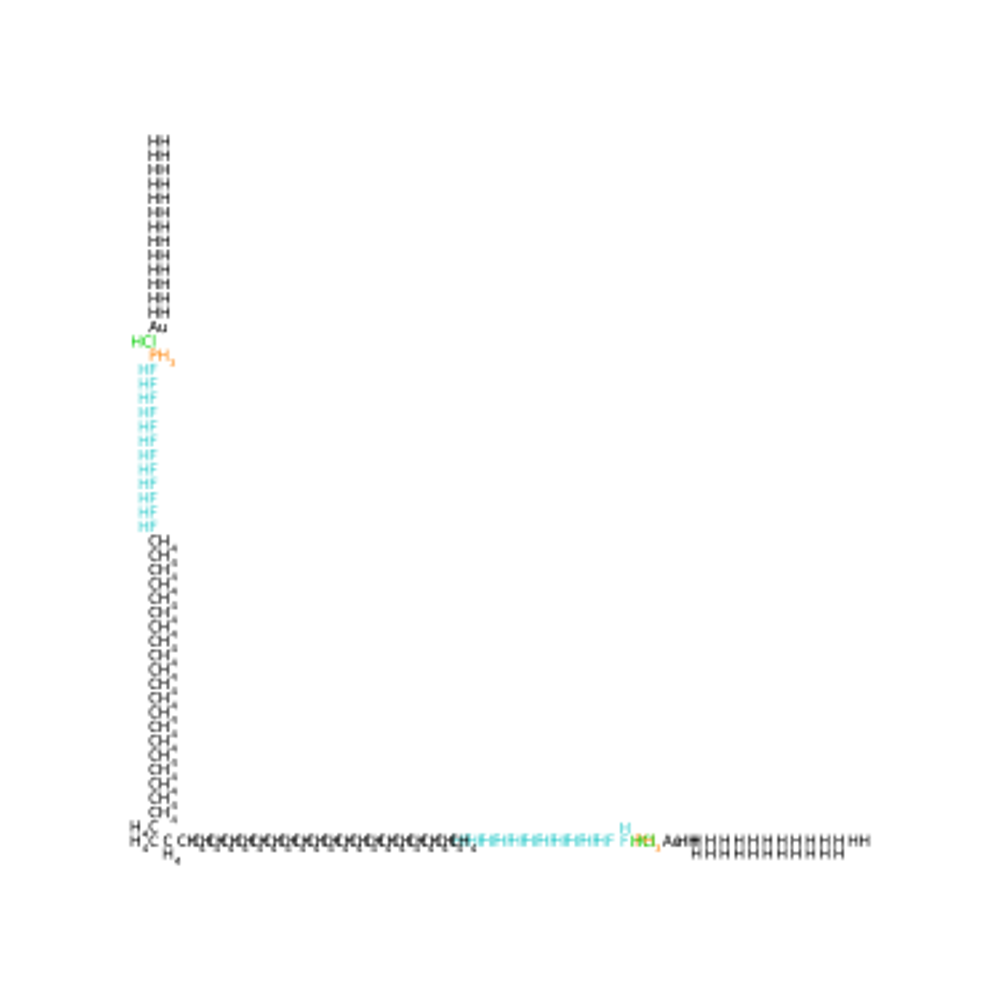


结构 2: frame_1_13-bis-trifluoromethyl-benzene_6_ethane_0_SINGLE_azane_0_0


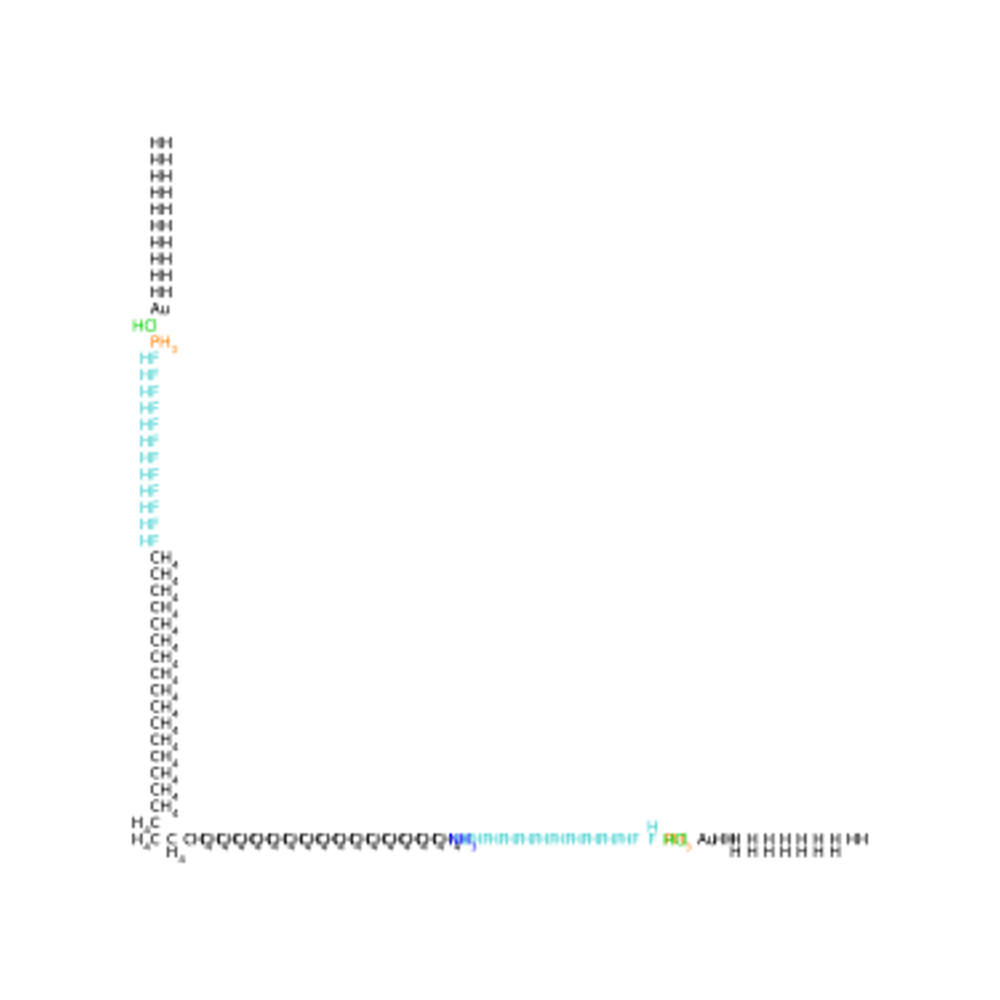


结构 3: frame_1_1H-pyrrole_0_benzene_0_SINGLE_azane_0_6


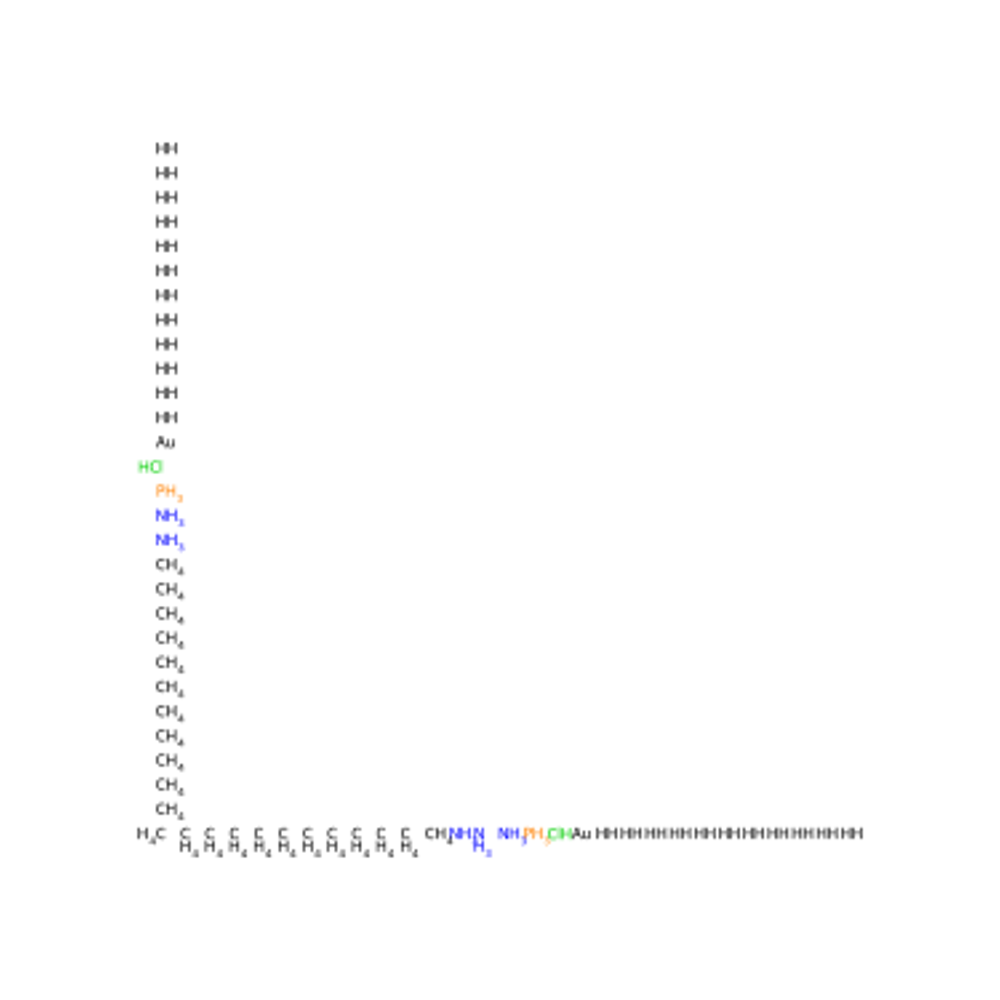


结构 4: frame_1_2-methylpropane_1_propane_1_SINGLE_acetylene_0_0


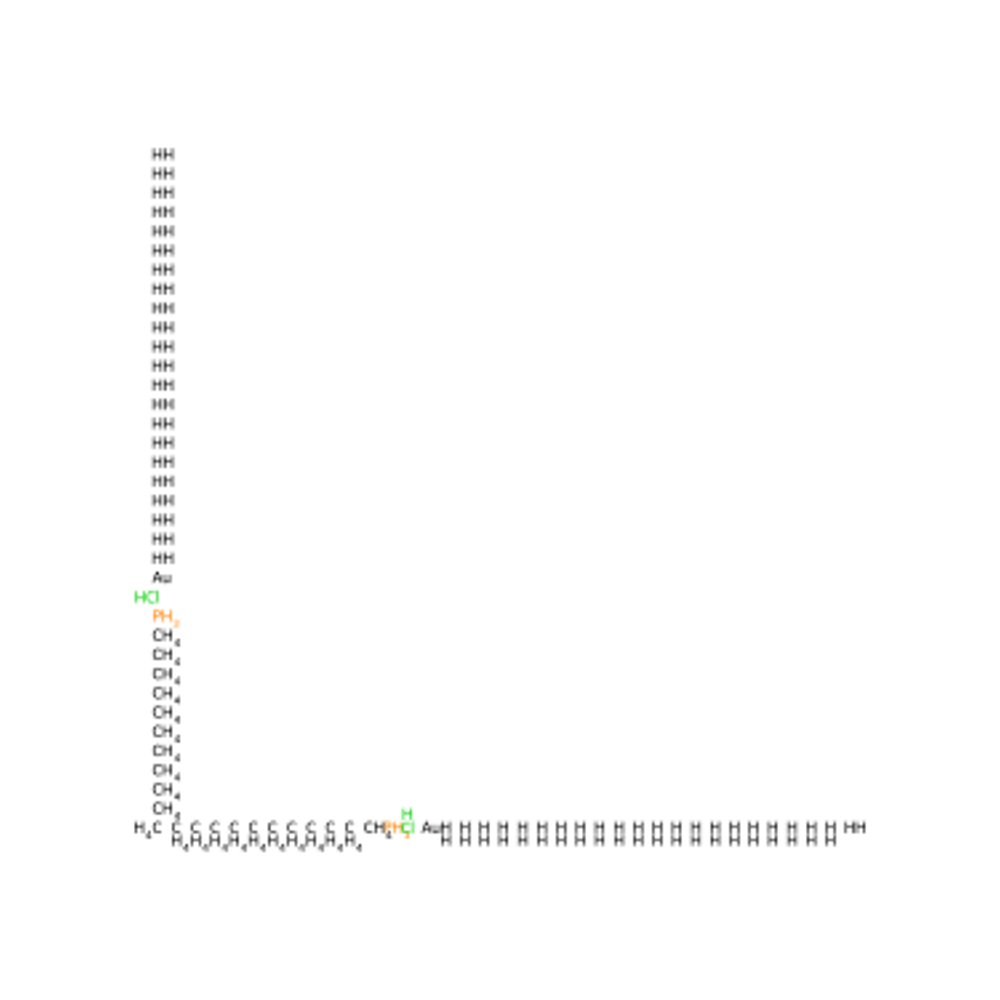


结构 5: frame_1_4H-pyran_5_chlorane_0_SINGLE_sulfane_0_1


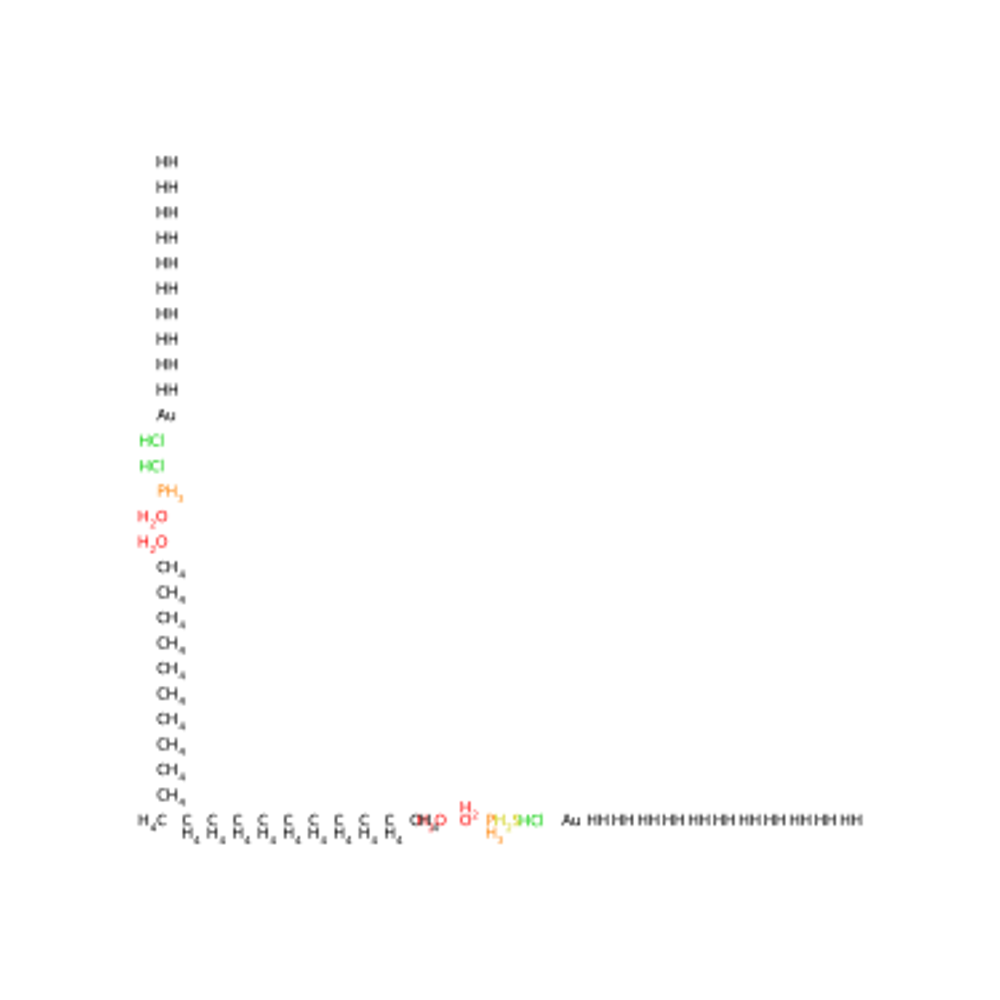

In [48]:
# 显示前5个结构
for idx, row in df.head().iterrows():
    print(f"\n结构 {idx + 1}: {row['name']}")
    # 从base64字符串创建图片
    try:
        img_data = row['structure_image']
        # 确保我们只获取base64数据部分
        if ',' in img_data:
            img_data = img_data.split(',')[1]
        img_bytes = base64.b64decode(img_data)
        img = Image.open(BytesIO(img_bytes))
        
        # 转换为RGB模式（如果需要）
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        # 调整图片大小和方向
        img = img.resize((800, 800))  # 调整大小
        
        # 创建一个新的白色背景
        bg = Image.new('RGB', (1000, 1000), 'white')
        # 将图片粘贴到白色背景的中心
        bg.paste(img, ((1000 - 800) // 2, (1000 - 800) // 2))
        
        display(bg)
    except Exception as e:
        print(f"无法显示图片: {e}")



结构 1: frame_1_13-bis-trifluoromethyl-benzene_6_butane_0_SINGLE_benzene_0_3


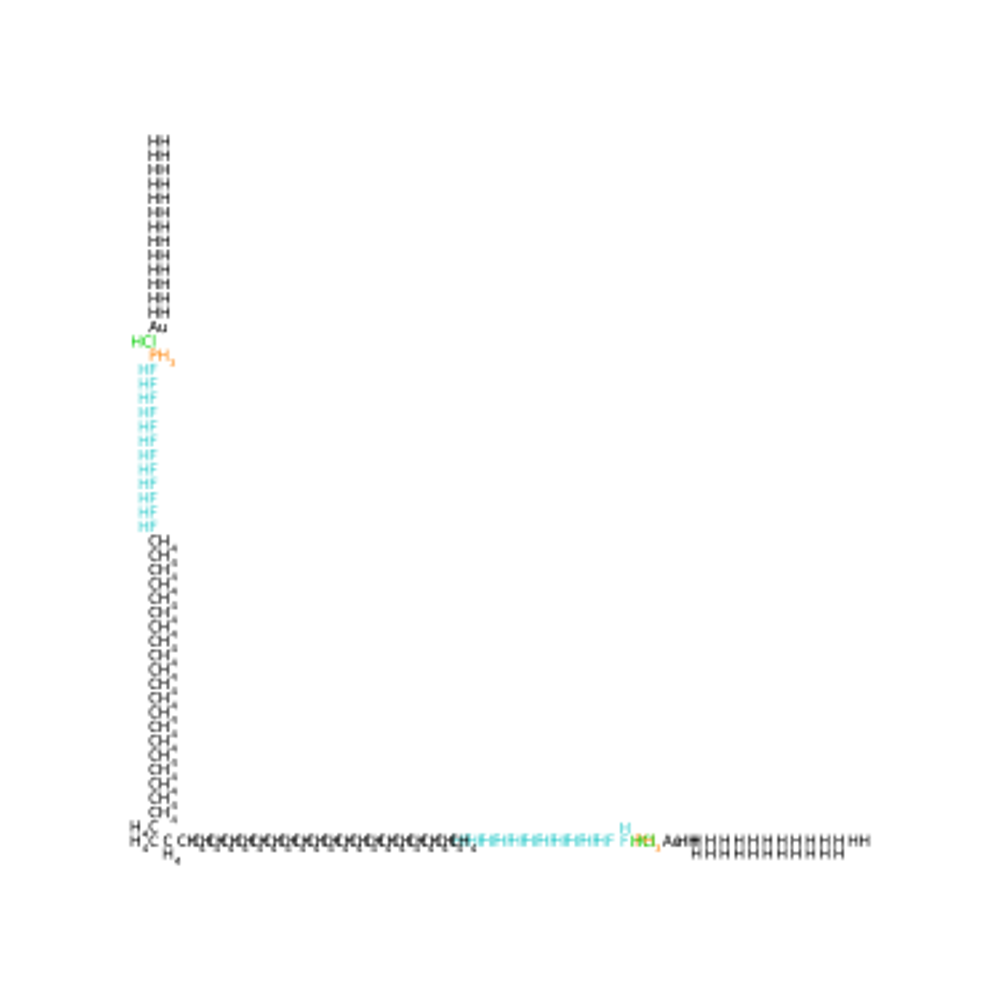


结构 2: frame_1_13-bis-trifluoromethyl-benzene_6_ethane_0_SINGLE_azane_0_0


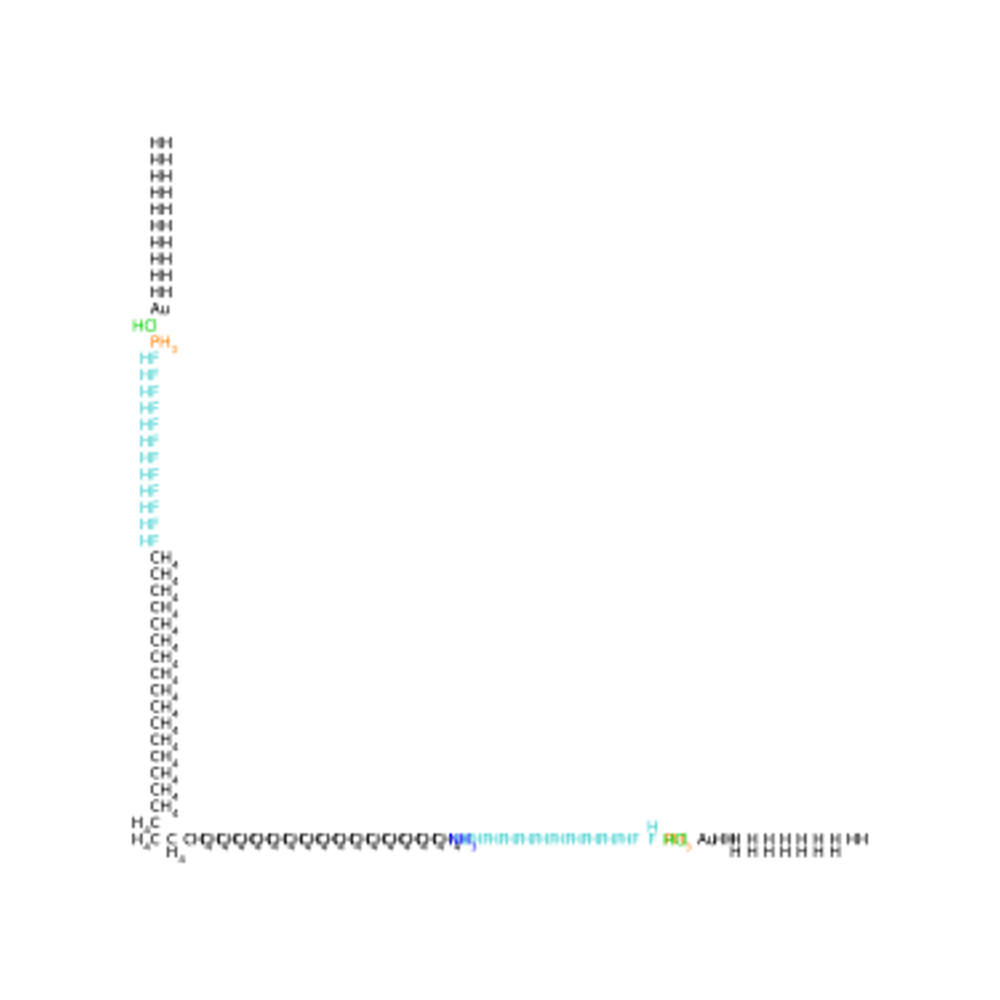


结构 3: frame_1_1H-pyrrole_0_benzene_0_SINGLE_azane_0_6


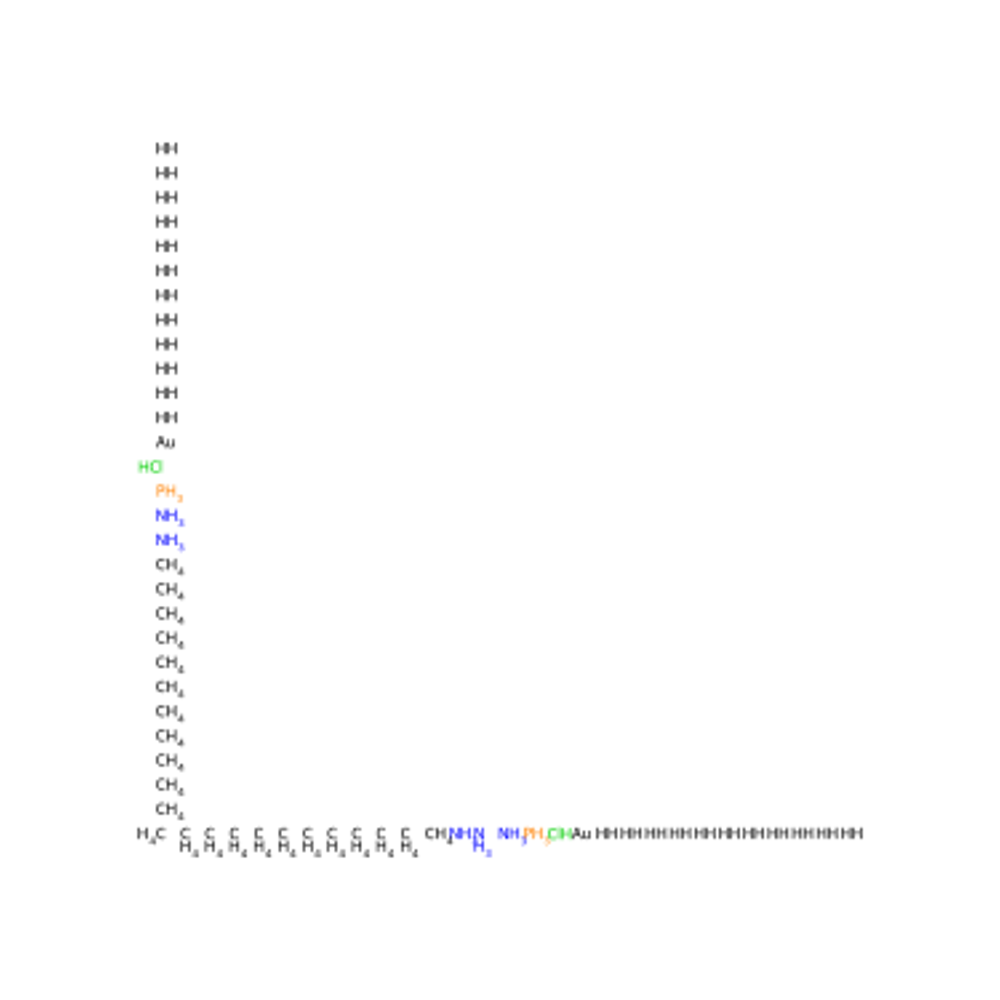


结构 4: frame_1_2-methylpropane_1_propane_1_SINGLE_acetylene_0_0


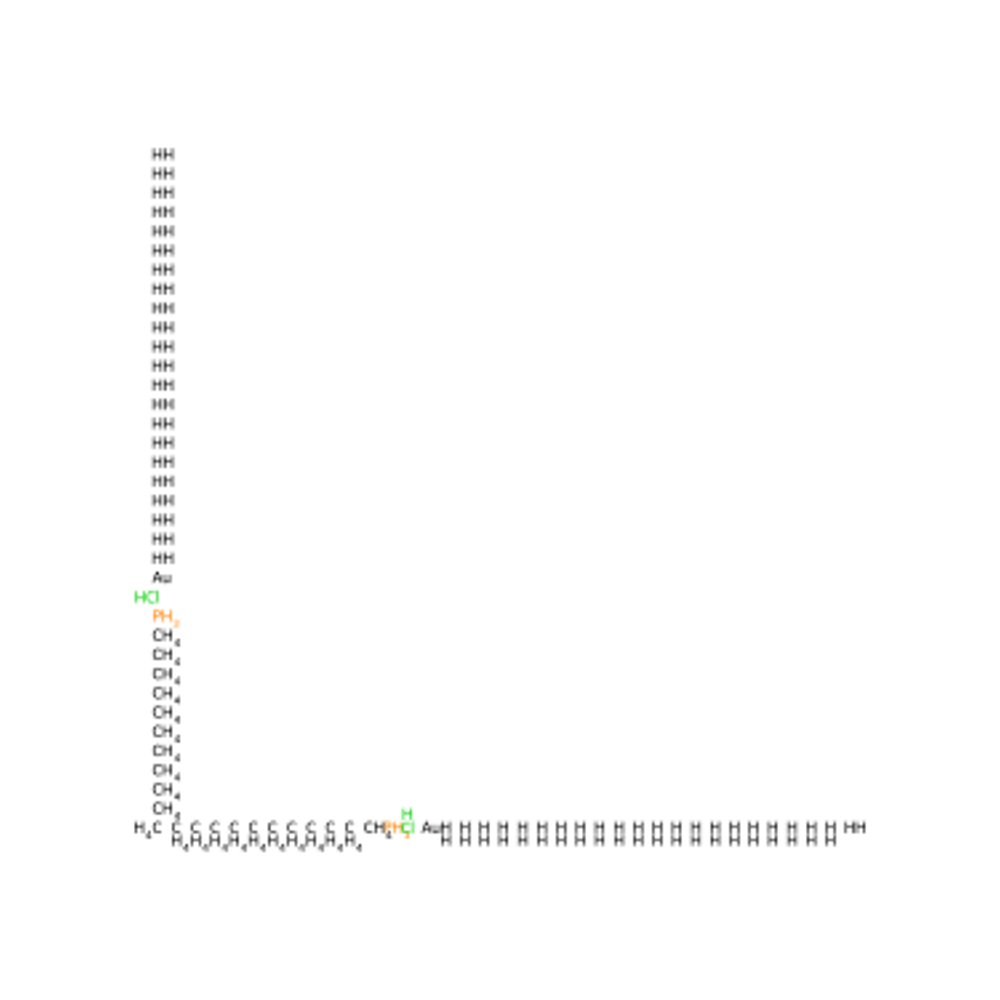


结构 5: frame_1_4H-pyran_5_chlorane_0_SINGLE_sulfane_0_1


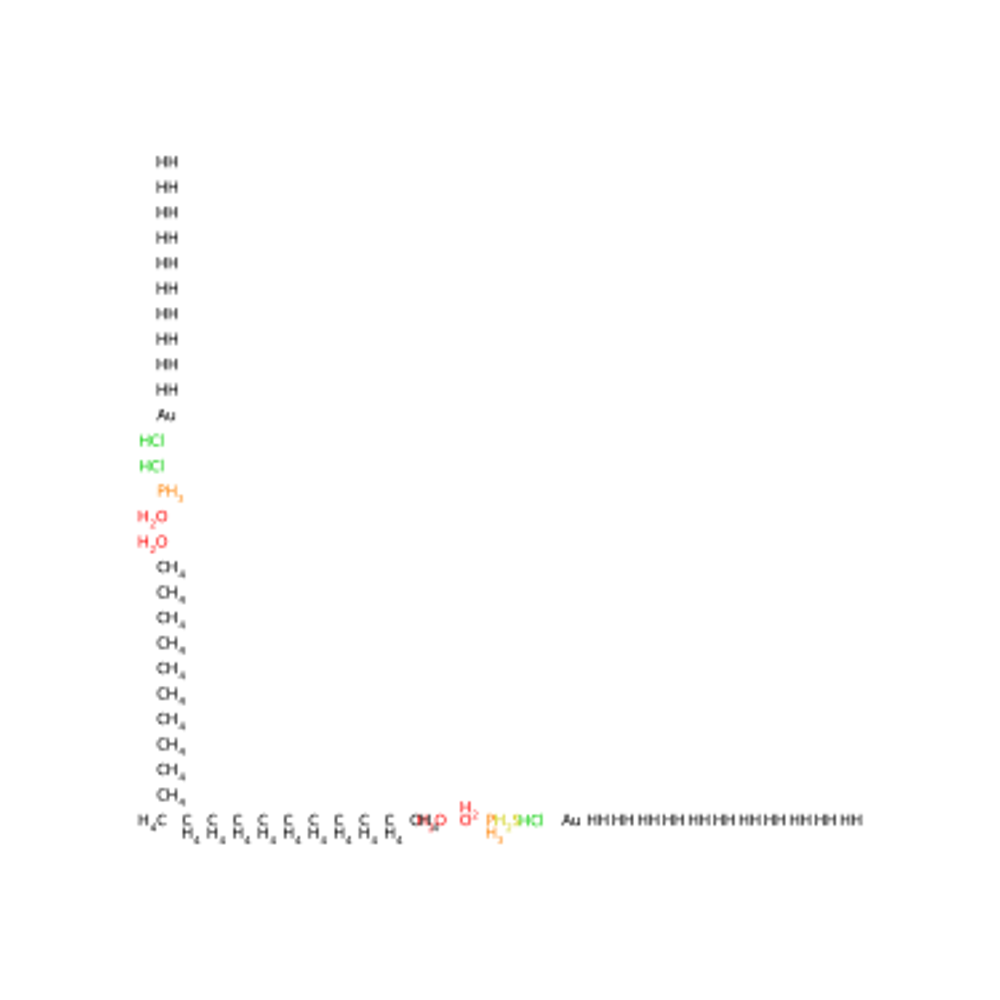


结构 6: frame_1_benzene_0


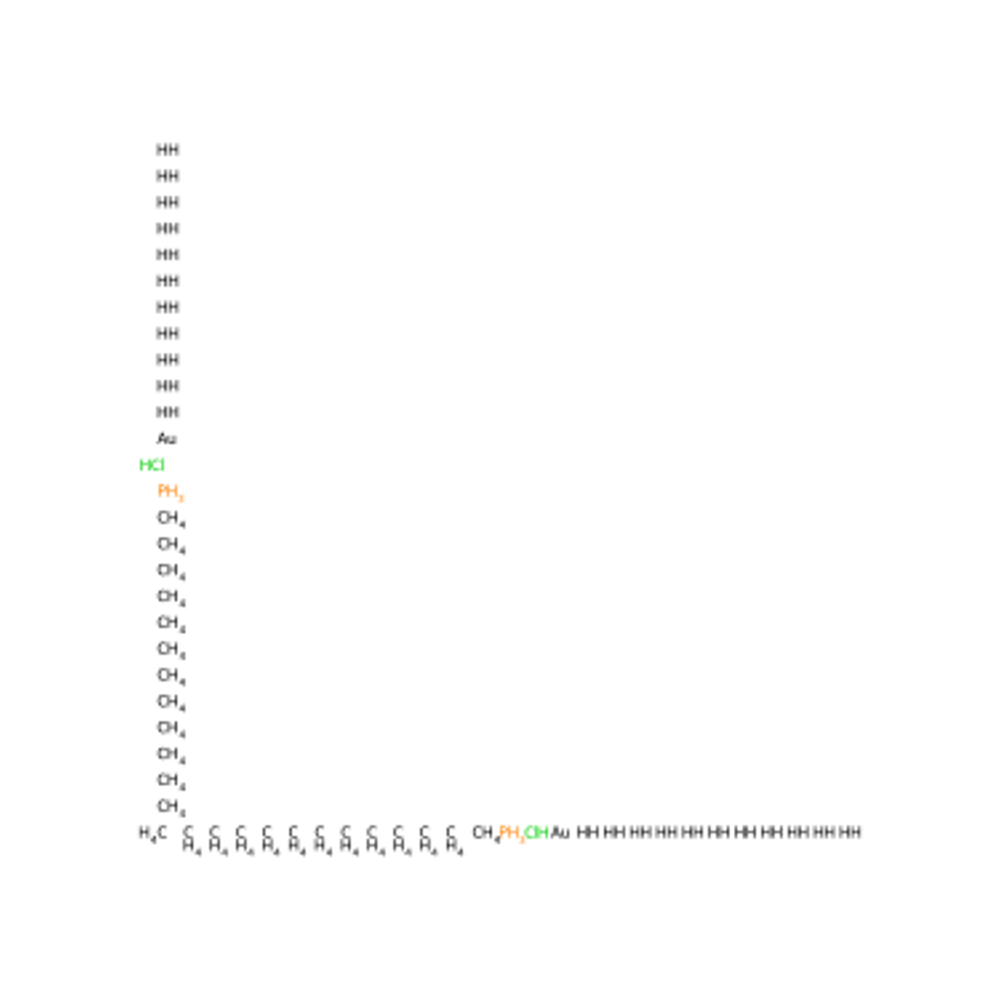


结构 7: frame_1_benzene_0_borane_0


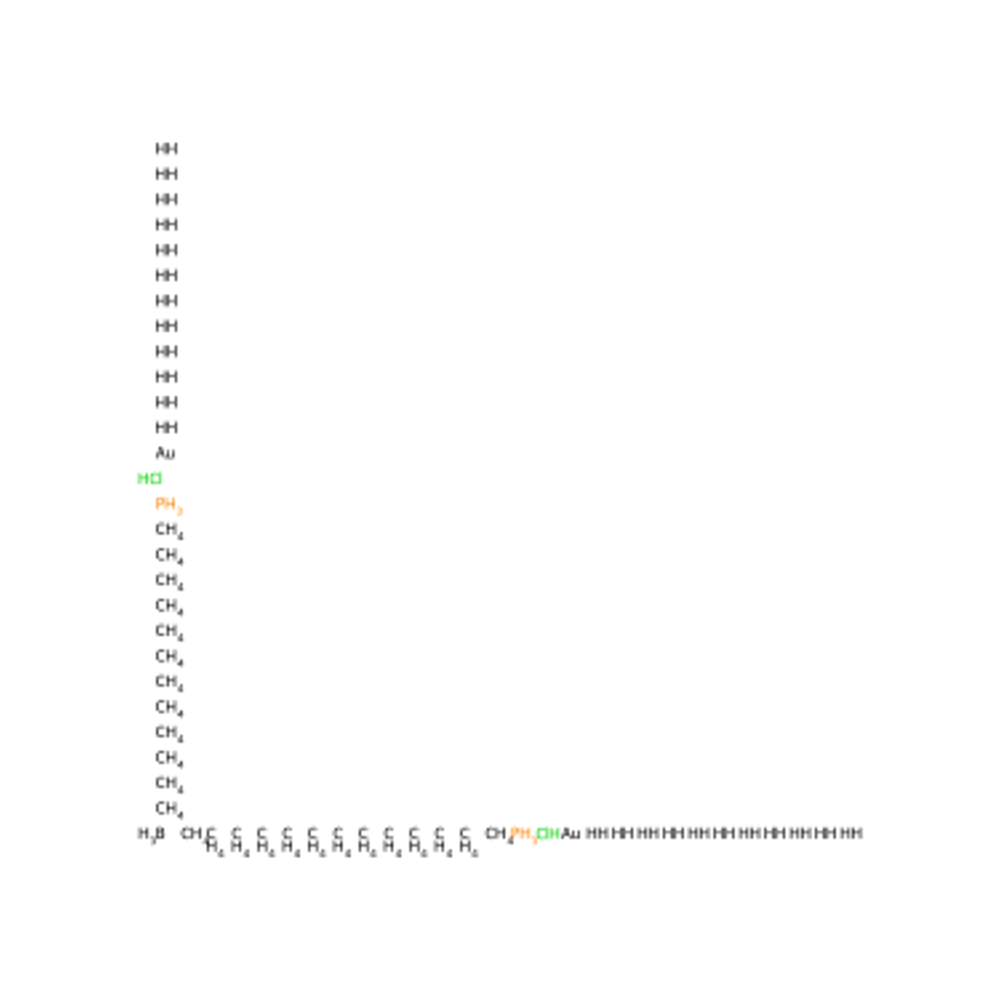


结构 8: frame_1_cyclohexane_0_butane_0_SINGLE_butane_0_3


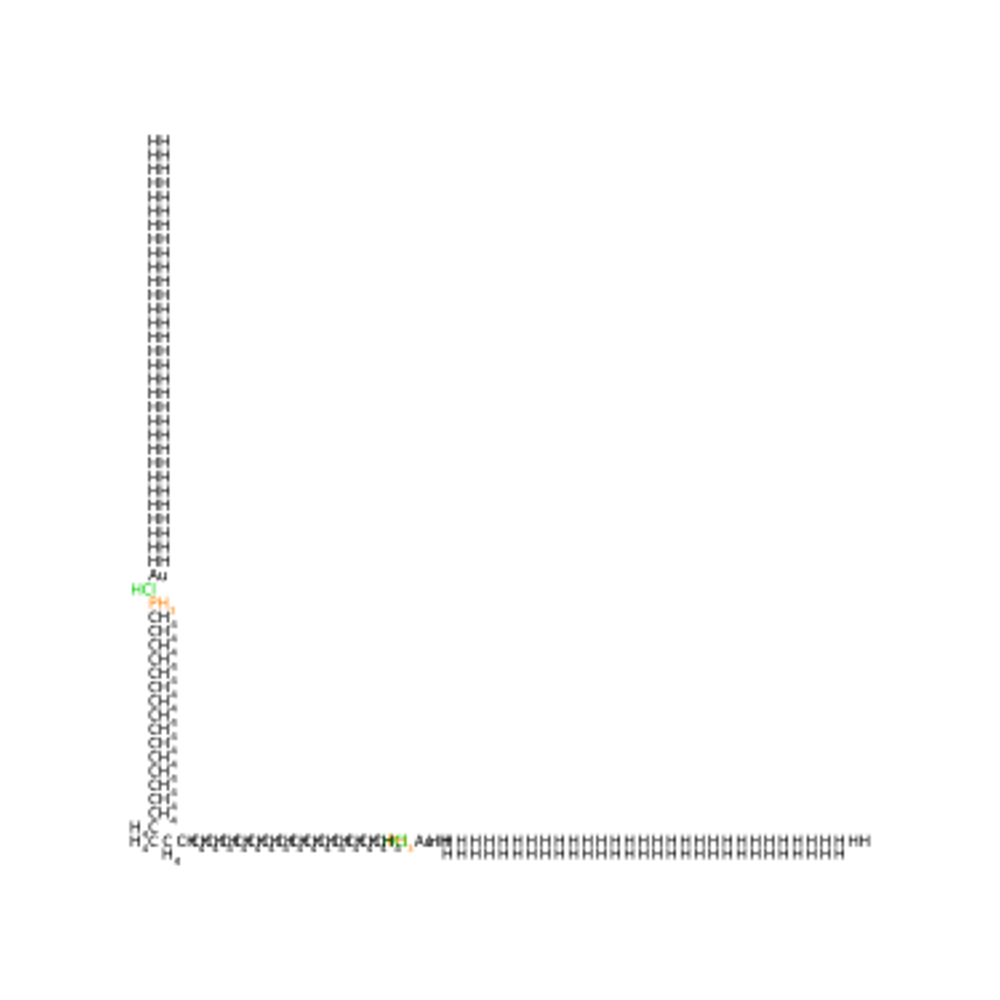


结构 9: frame_1_cyclopentene_3_butane_1_SINGLE_methanol_1_4


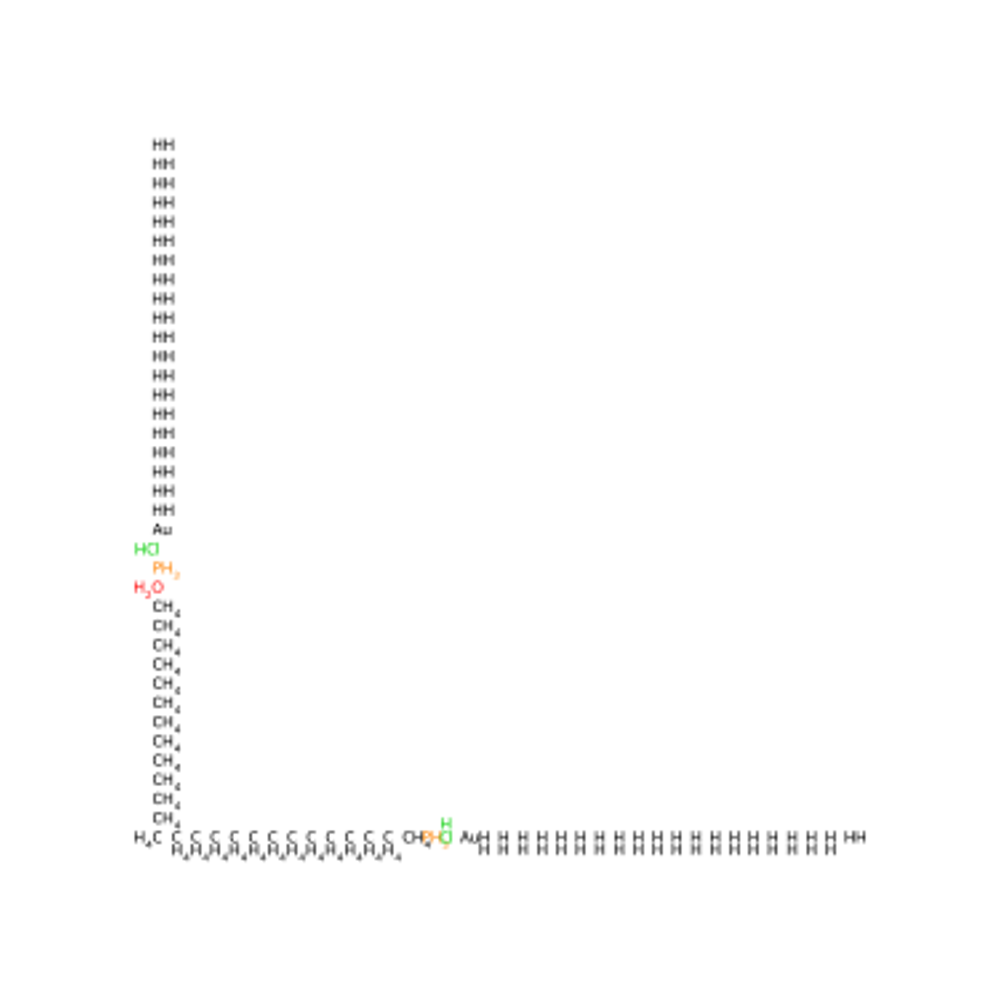


结构 10: frame_1_oxolane_2_butane_0_SINGLE_benzene_0_3


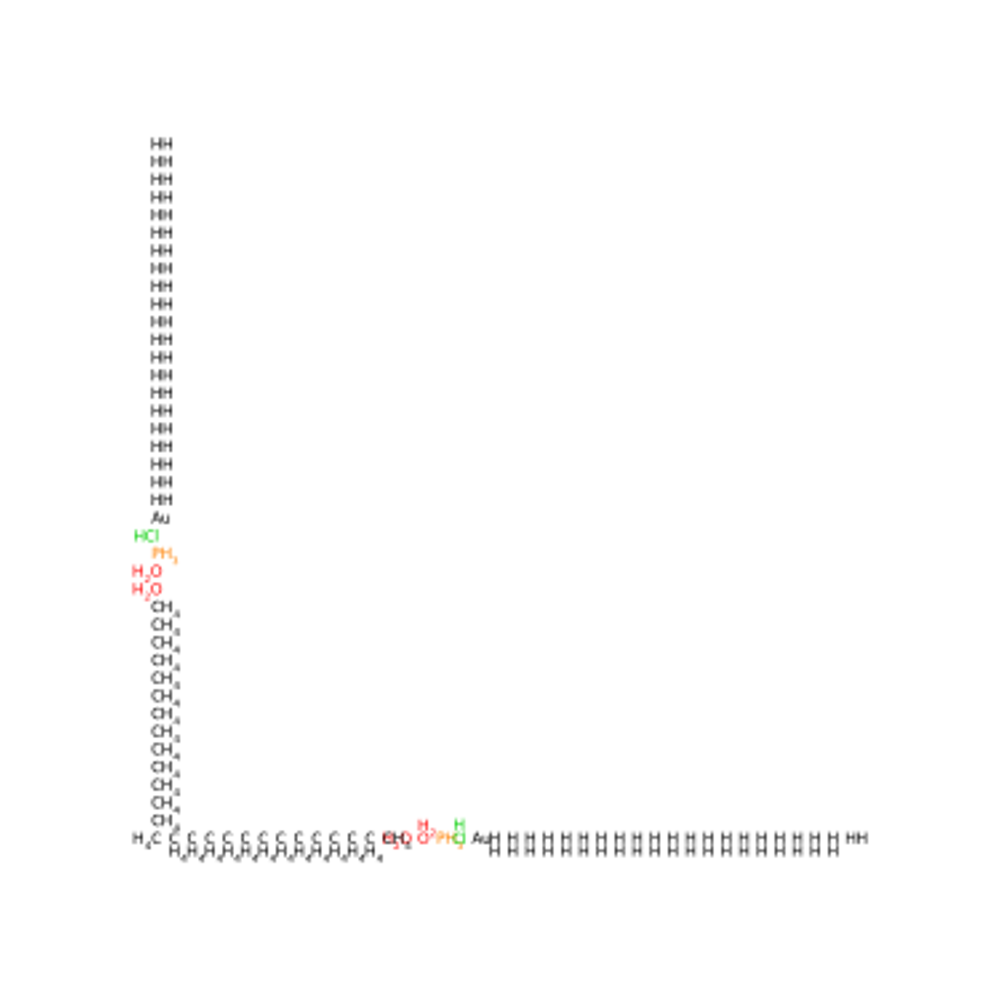


结构 11: frame_1_oxolane_2_butane_0_SINGLE_butane_0_3


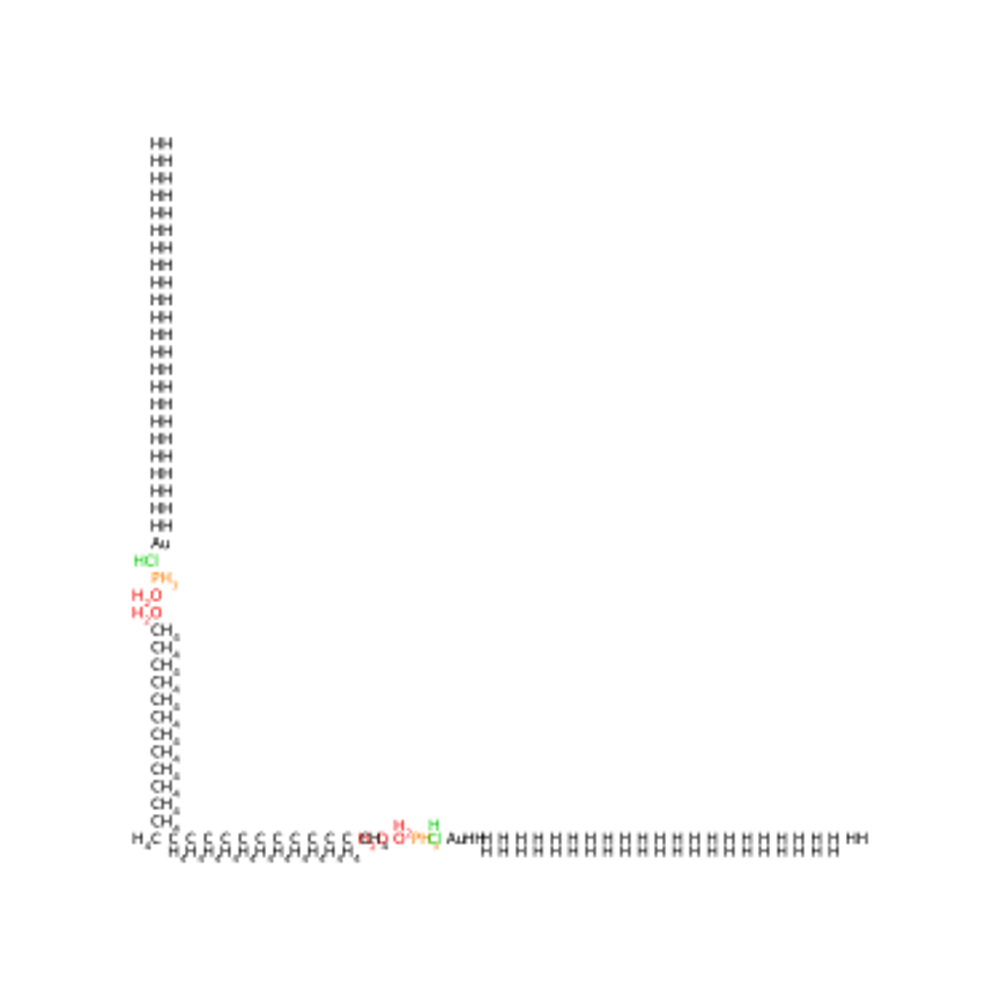


结构 12: frame_1_pyrazine_0_bromane_0_SINGLE_oxidane_0_1


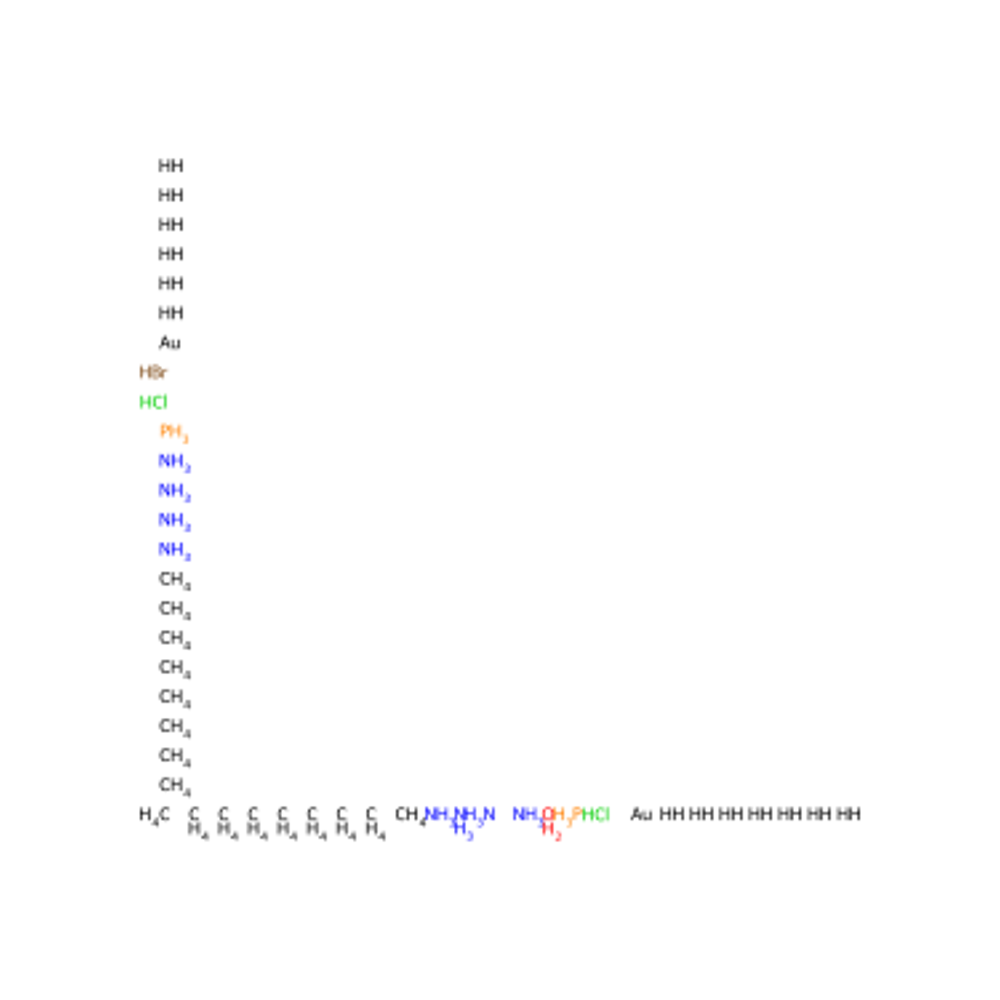


结构 13: frame_2_2-methylpropane_1_bromane_0_SINGLE_methanol_1_1


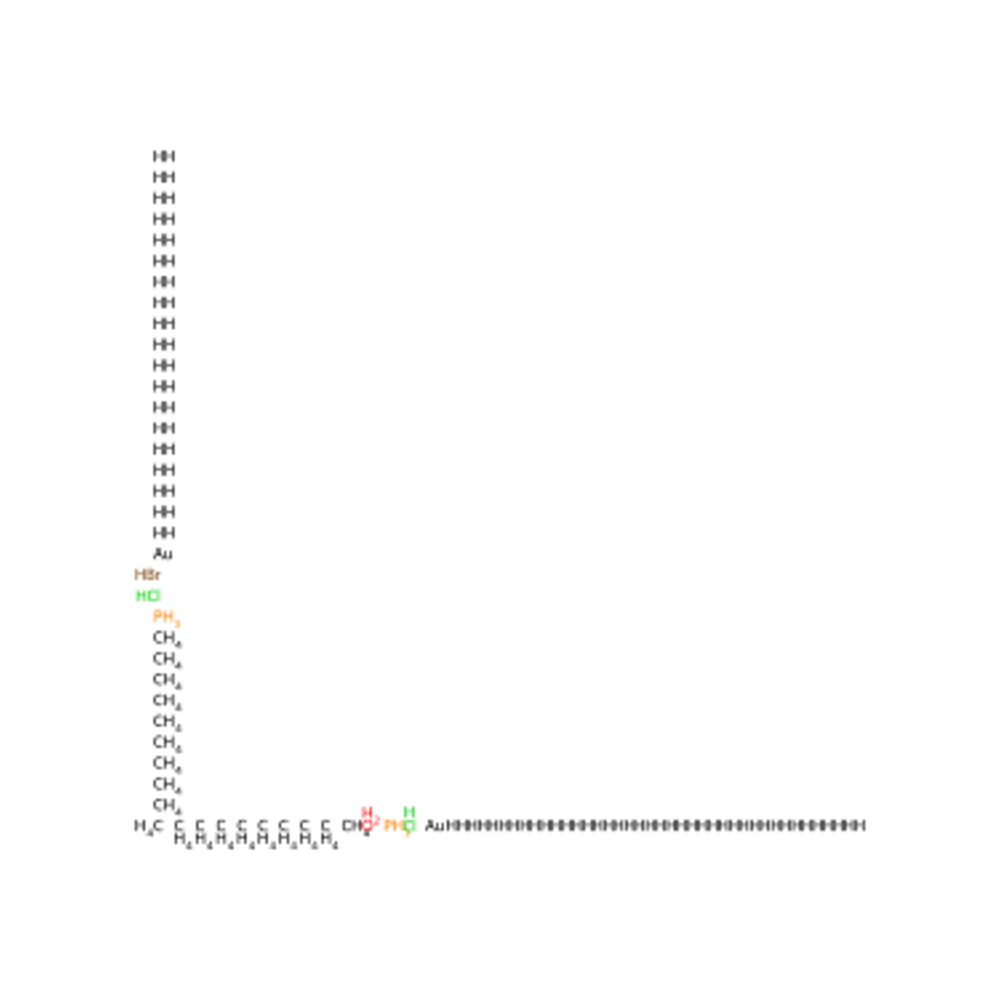


结构 14: frame_2_2-methylpropane_1_butane_0_SINGLE_butane_0_3


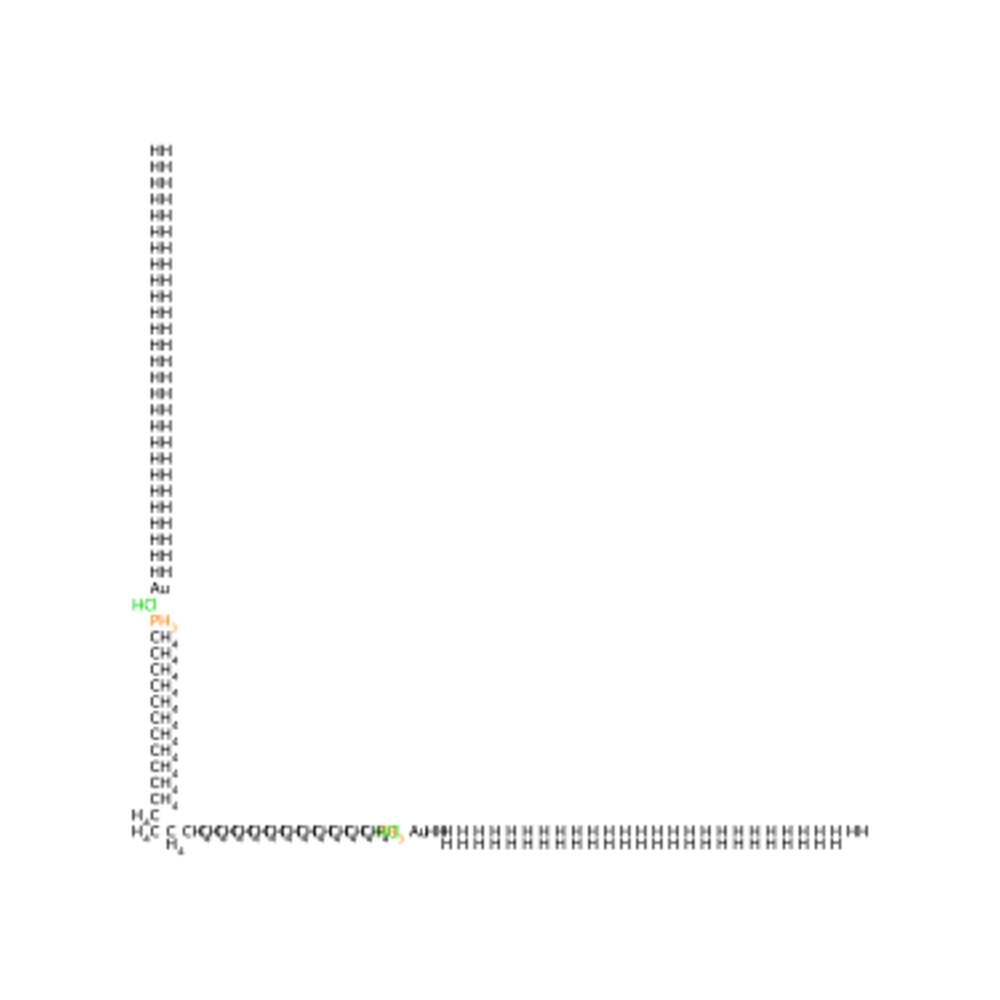


结构 15: frame_2_4H-pyran_1_benzene_0_SINGLE_benzene_0_3


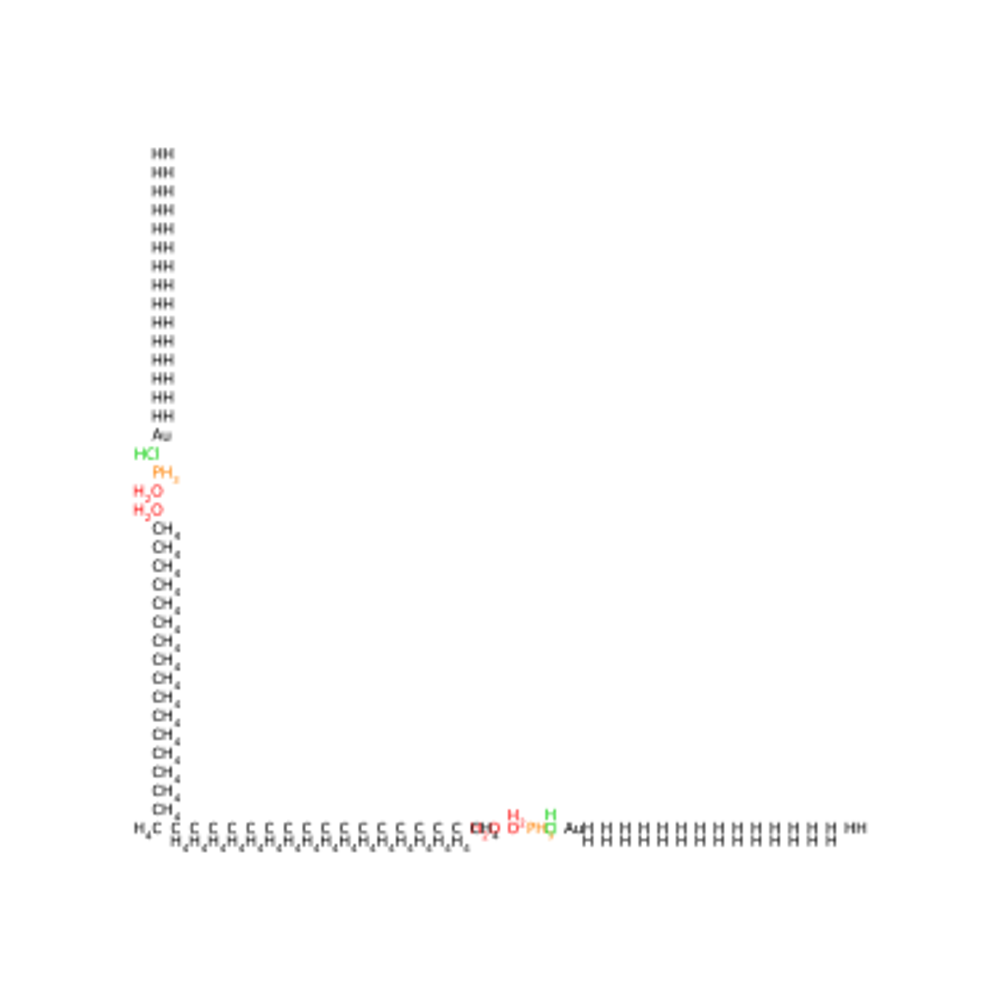


结构 16: frame_2_benzene_0_benzene_0


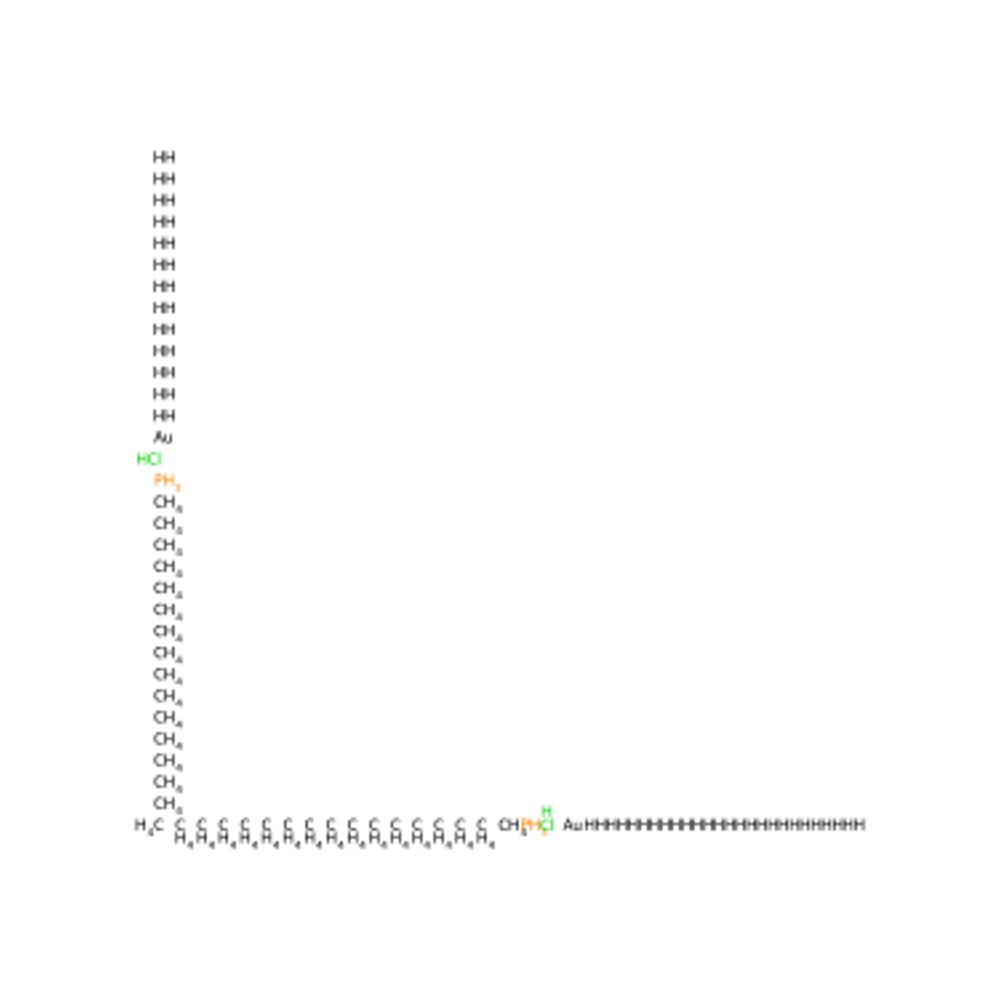


结构 17: frame_2_furan_0_butane_0_SINGLE_butane_0_2


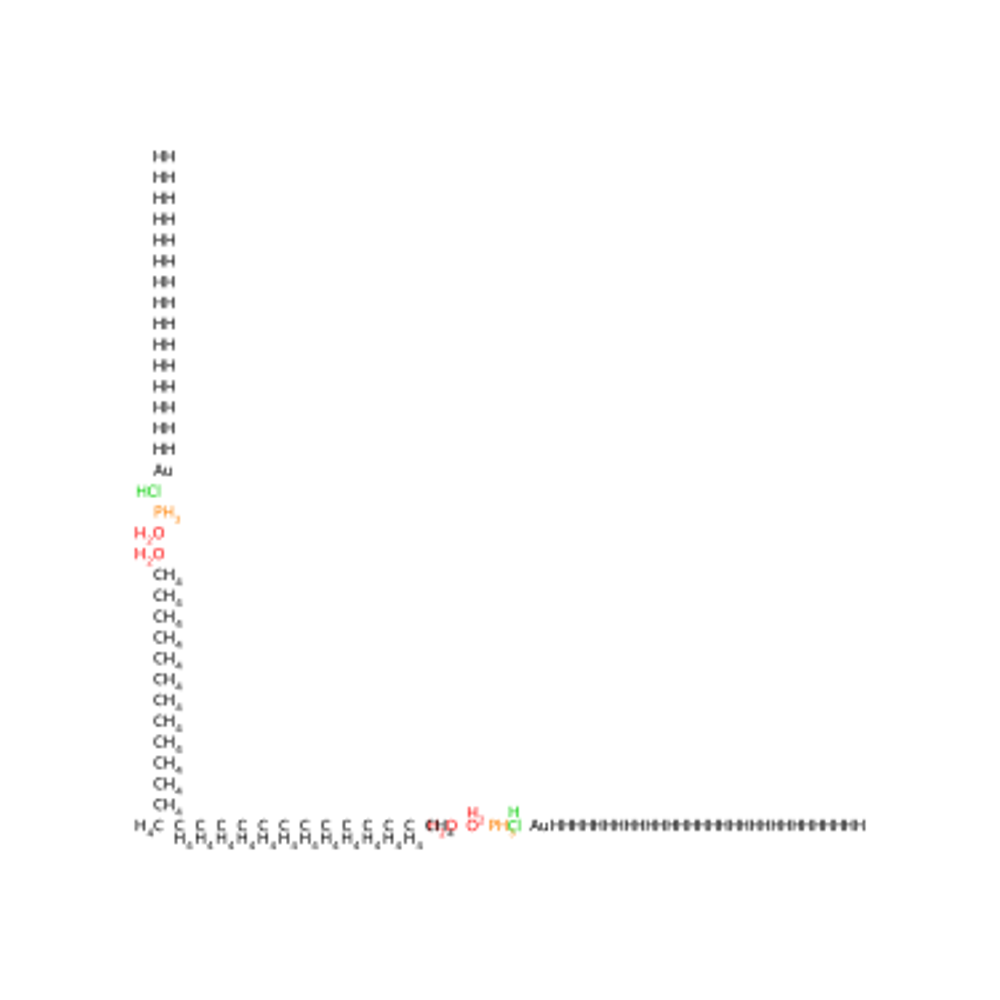


结构 18: frame_2_naphthalene_0_butane_0_SINGLE_butane_0_2


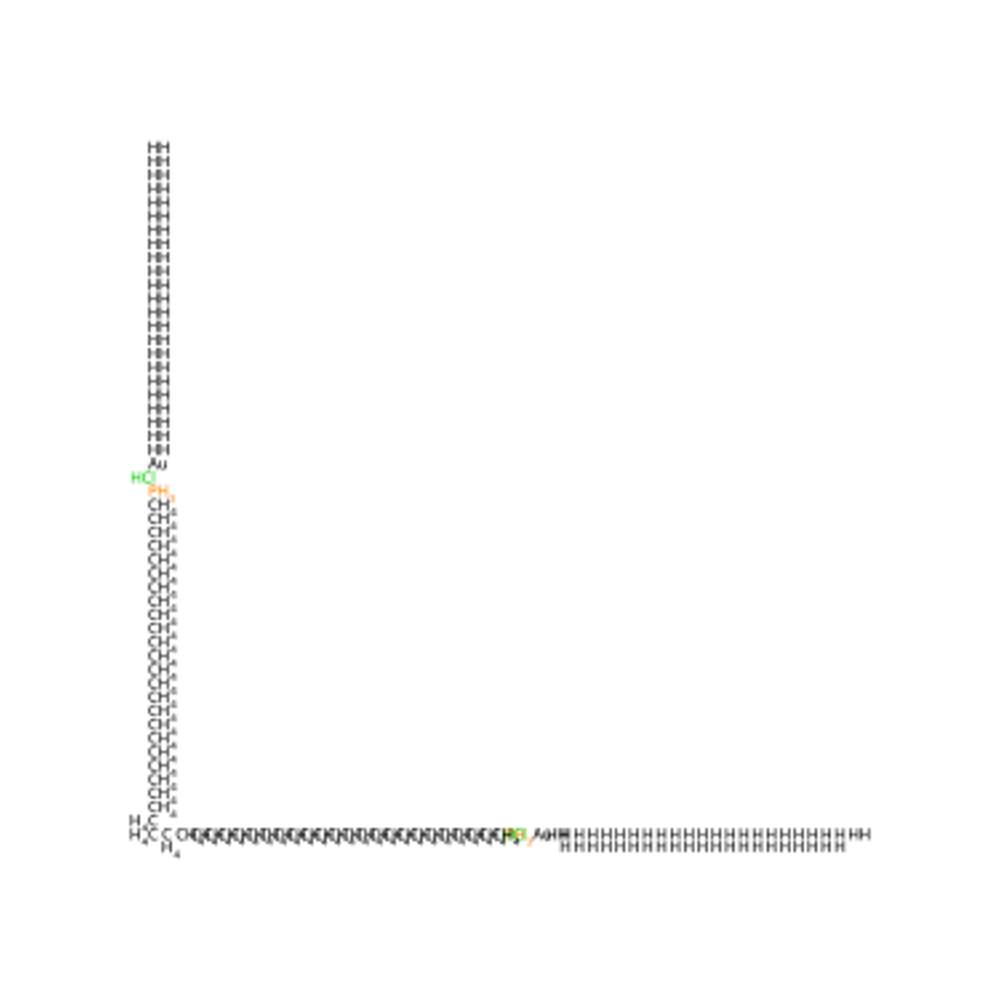


结构 19: frame_2_naphthalene_0_butane_0_SINGLE_butane_0_3


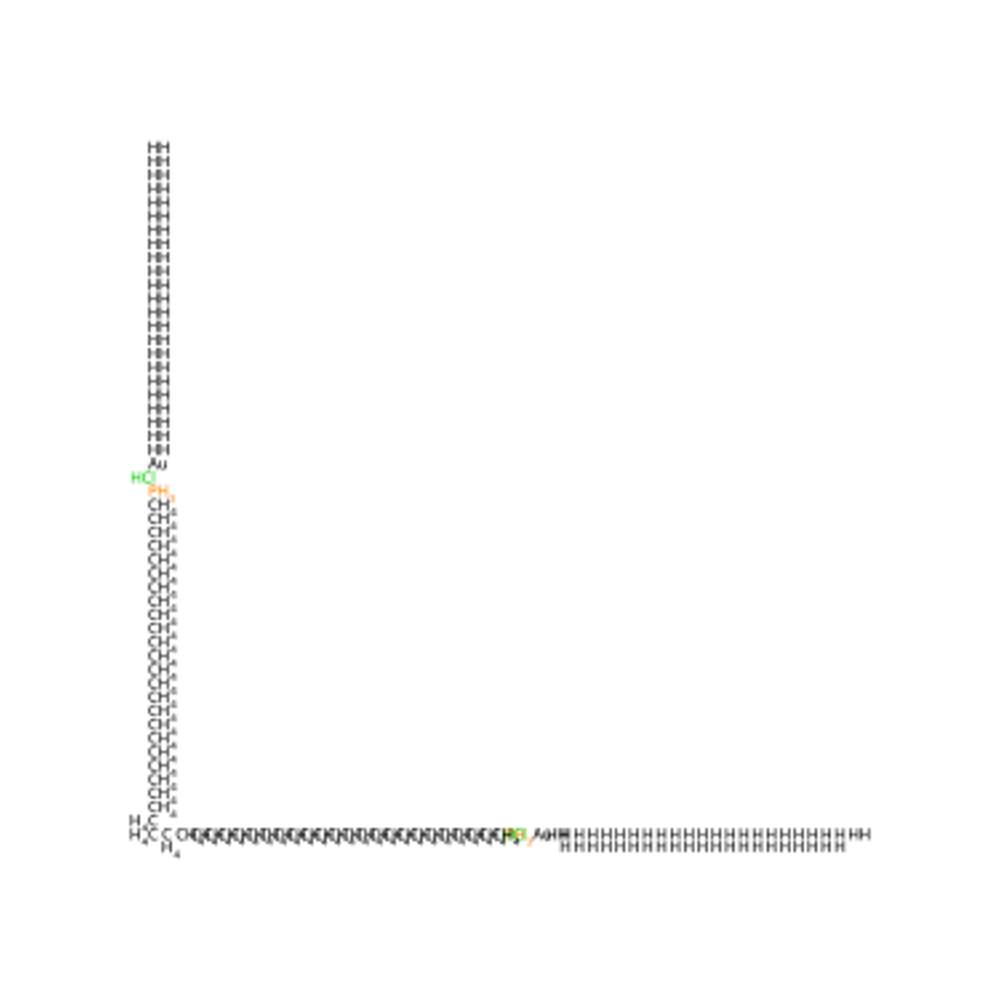


结构 20: frame_2_oxolane_0_acetylene_0_SINGLE_borane_0_2


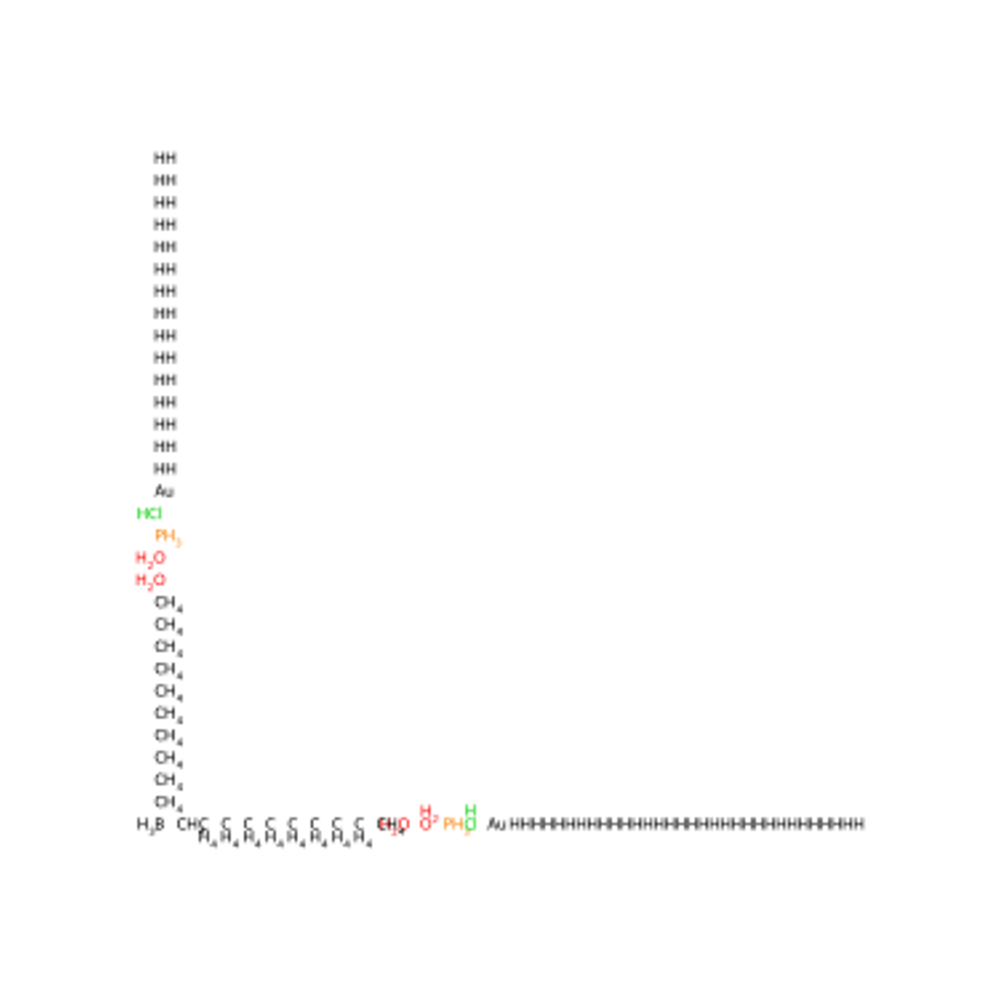


结构 21: frame_2_oxolane_0_propane_0_SINGLE_borane_0_3


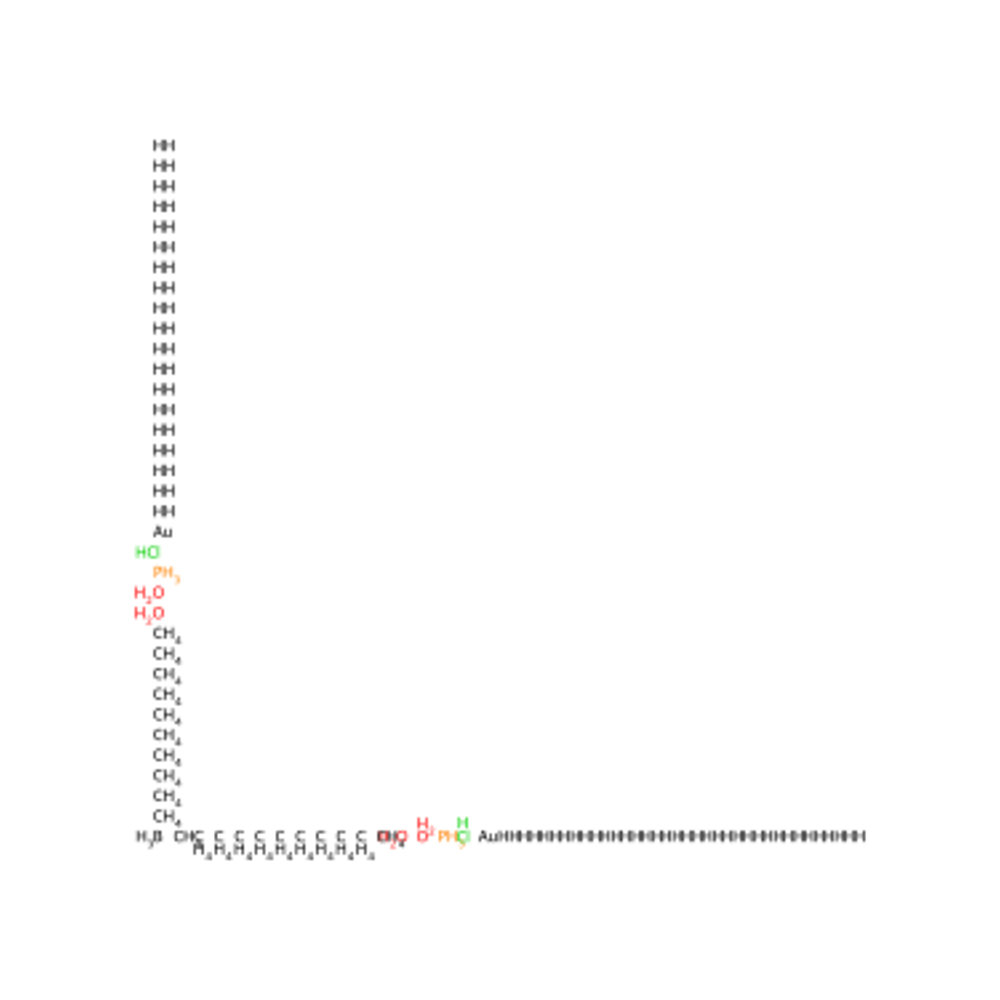


结构 22: frame_2_oxolane_2_acetylene_0_SINGLE_benzene_0_5


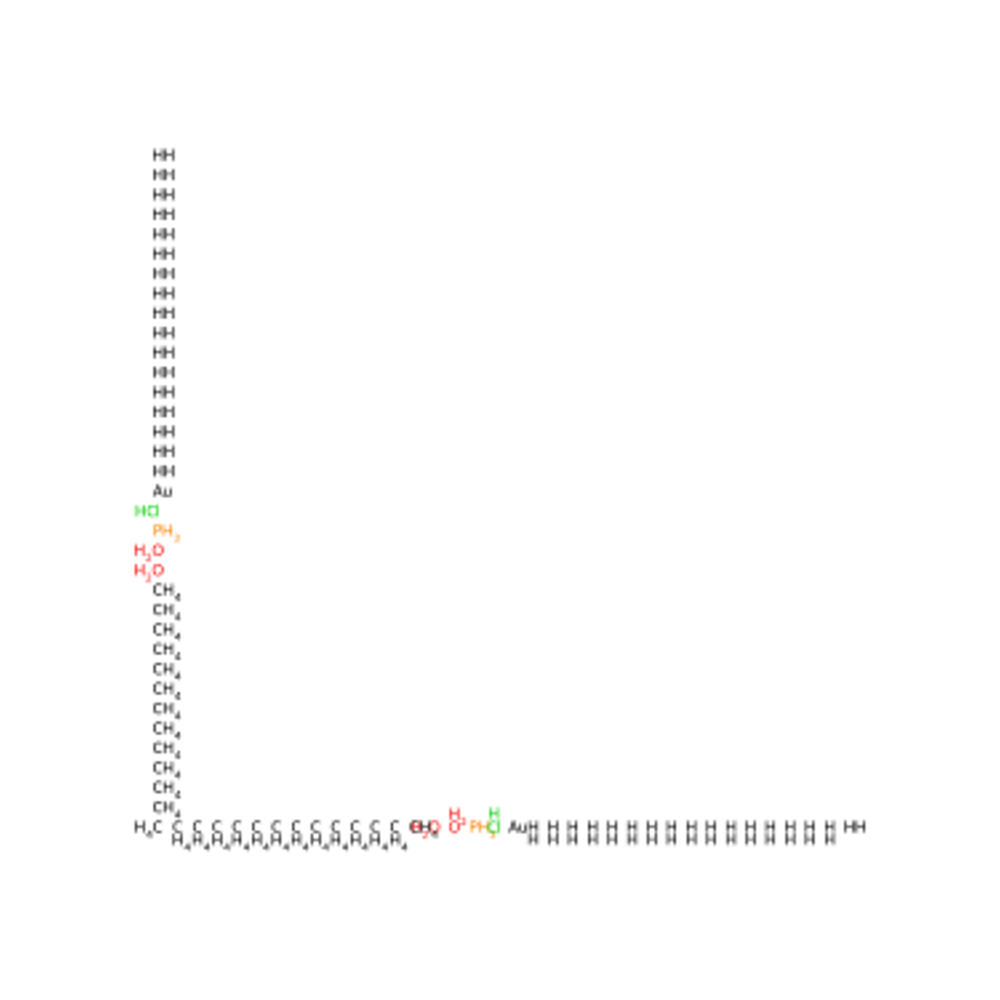


结构 23: frame_2_oxolane_2_butane_0_SINGLE_benzene_0_3


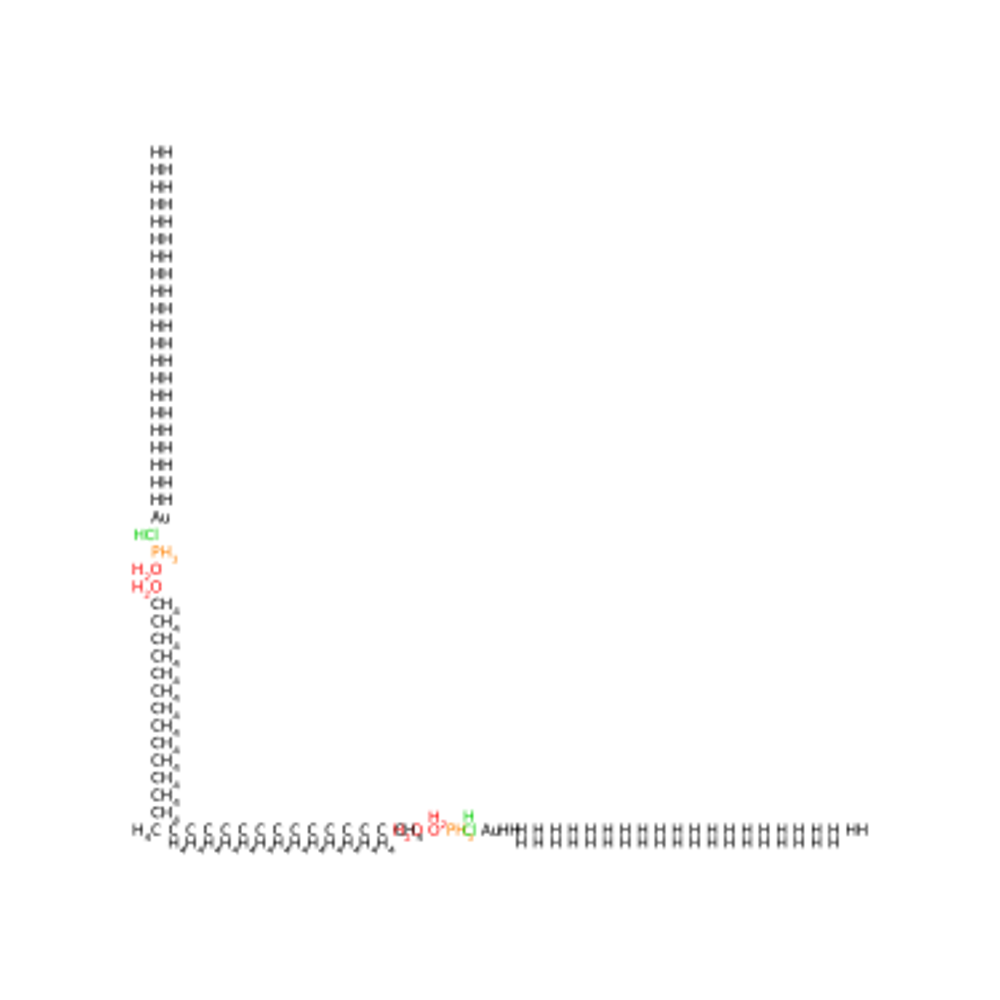


结构 24: frame_2_oxolane_2_butane_0_SINGLE_benzene_0_7


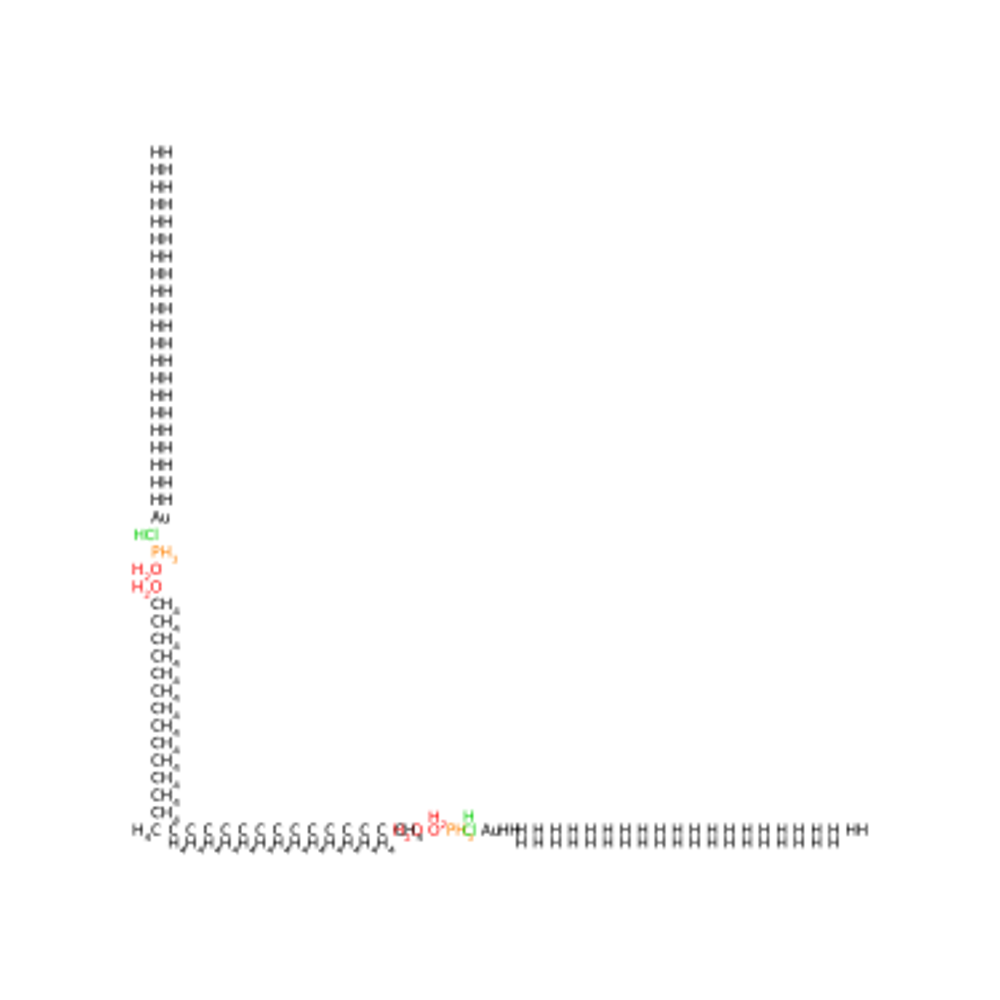


结构 25: frame_2_oxolane_2_butane_0_SINGLE_butane_0_3


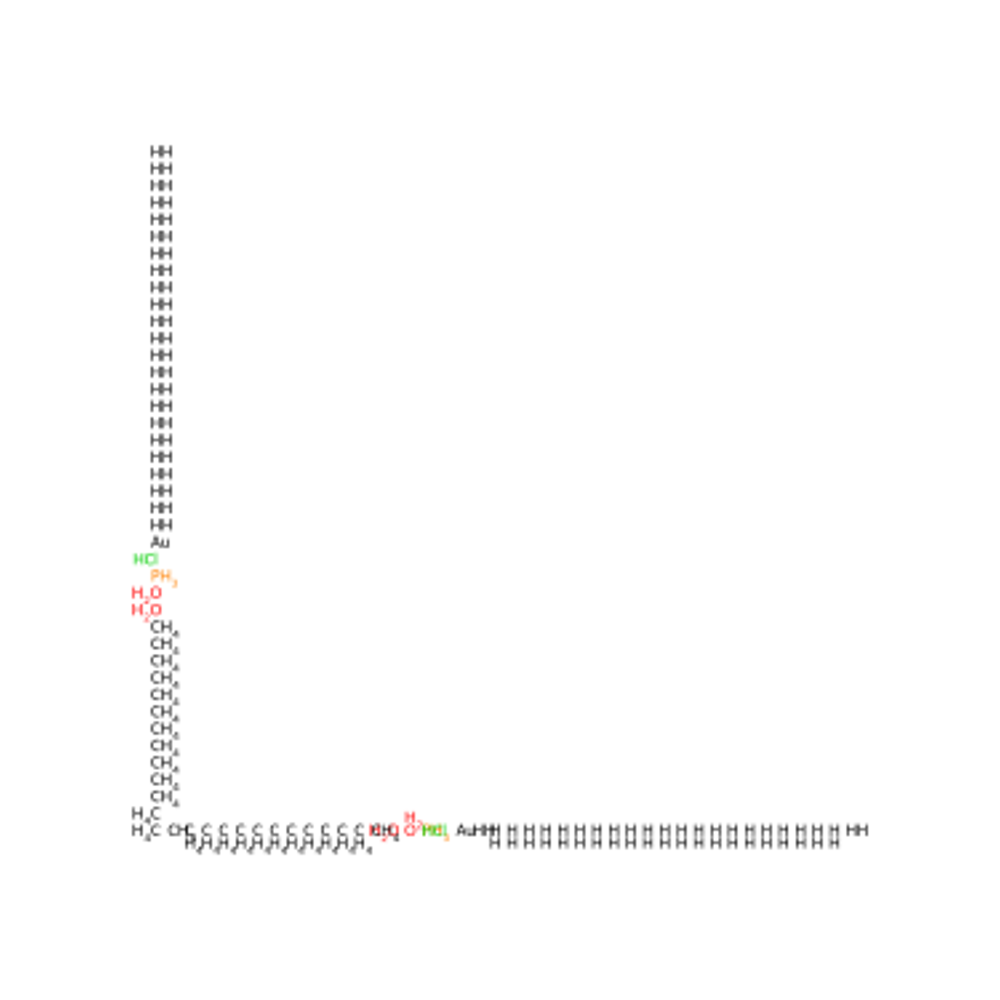


结构 26: frame_2_oxolane_2_butane_1_SINGLE_benzene_0_0


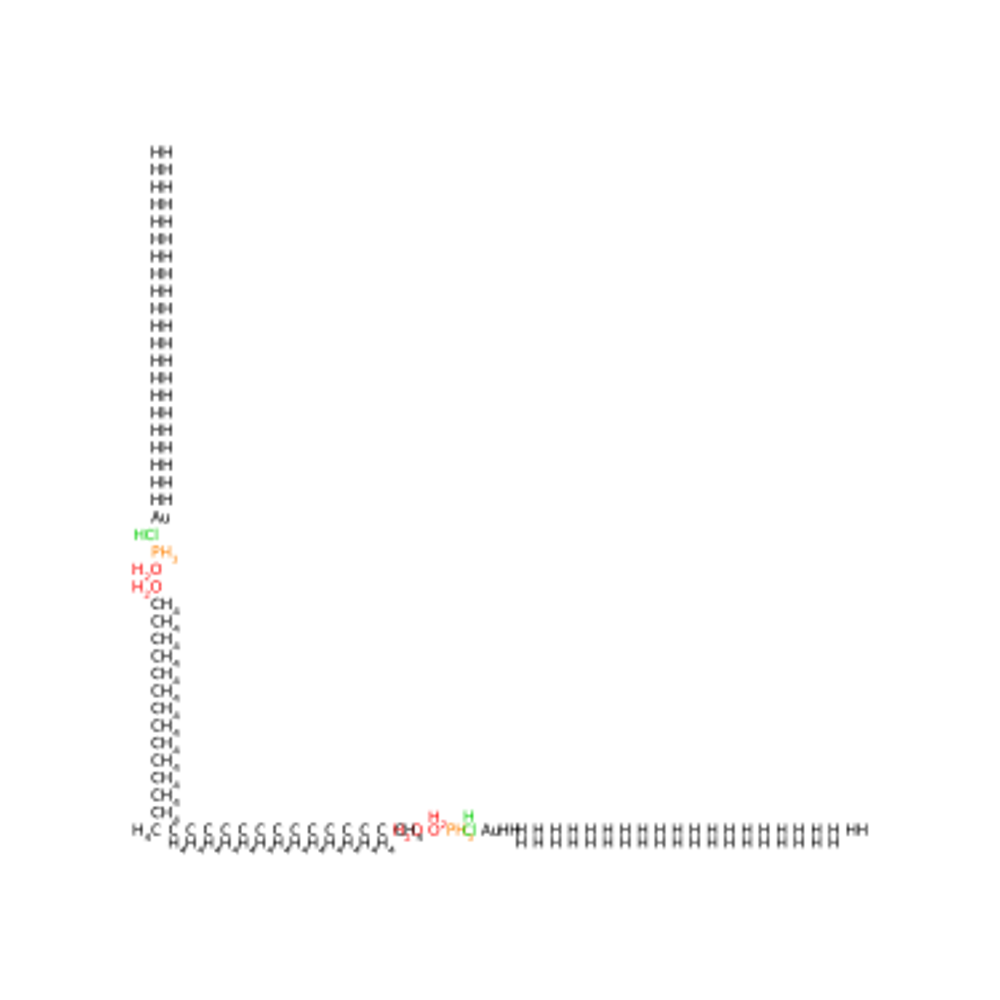


结构 27: frame_2_oxolane_2_ethene_0_SINGLE_benzene_0_1


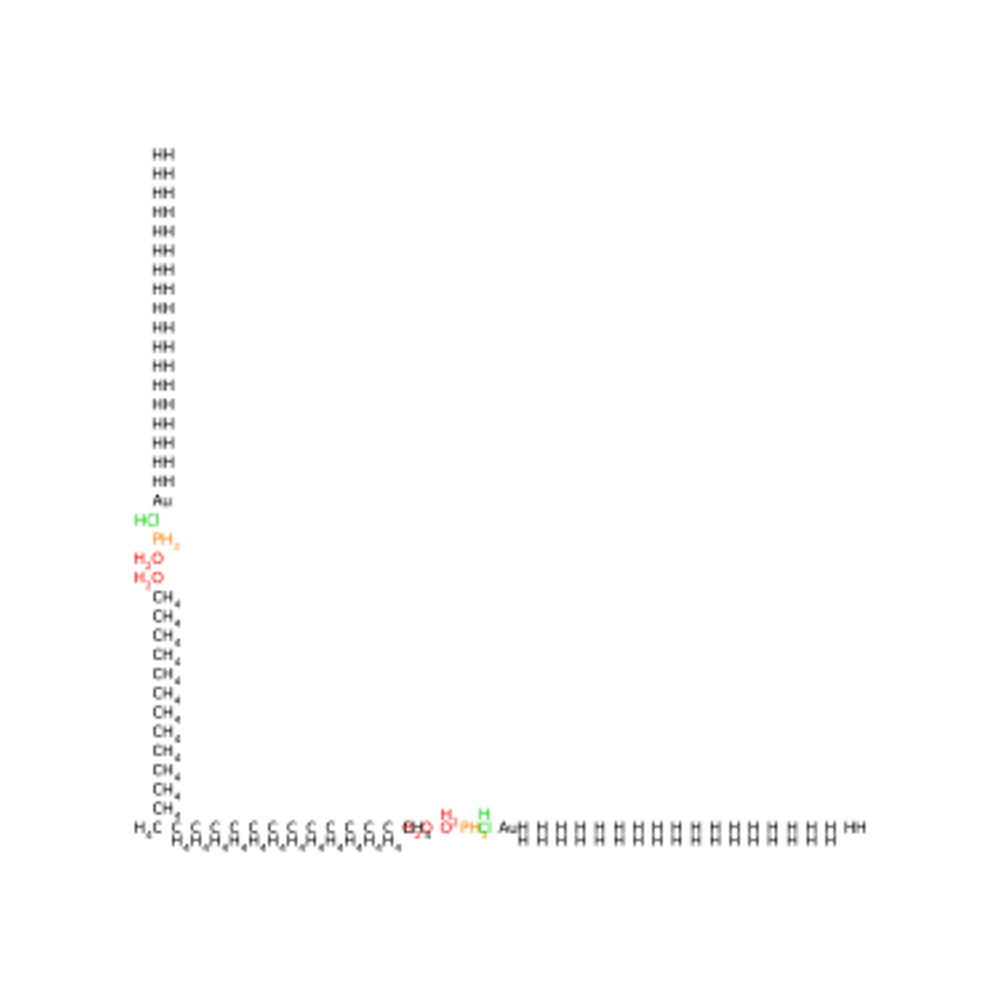


结构 28: frame_2_pyrimidine_0_benzene_0_SINGLE_benzene_0_2


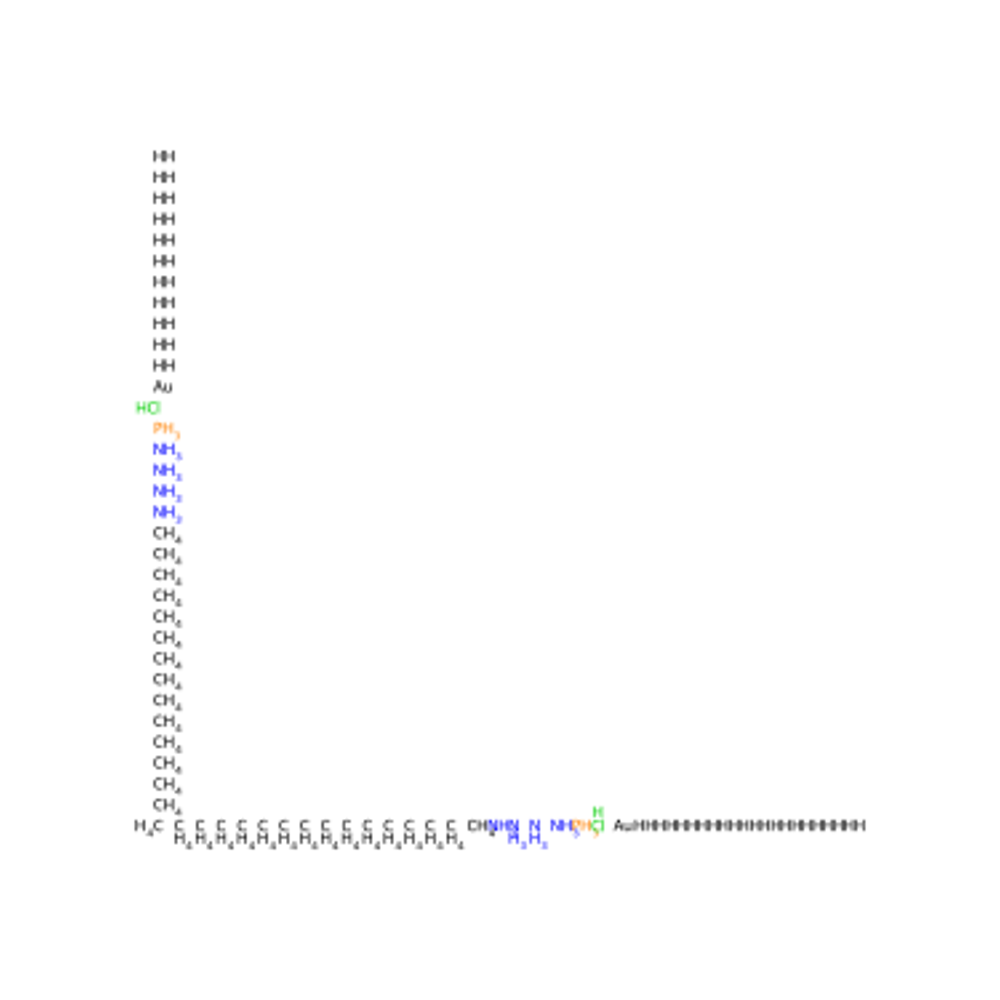


结构 29: frame_2_pyrimidine_0_butane_0_SINGLE_benzene_0_7


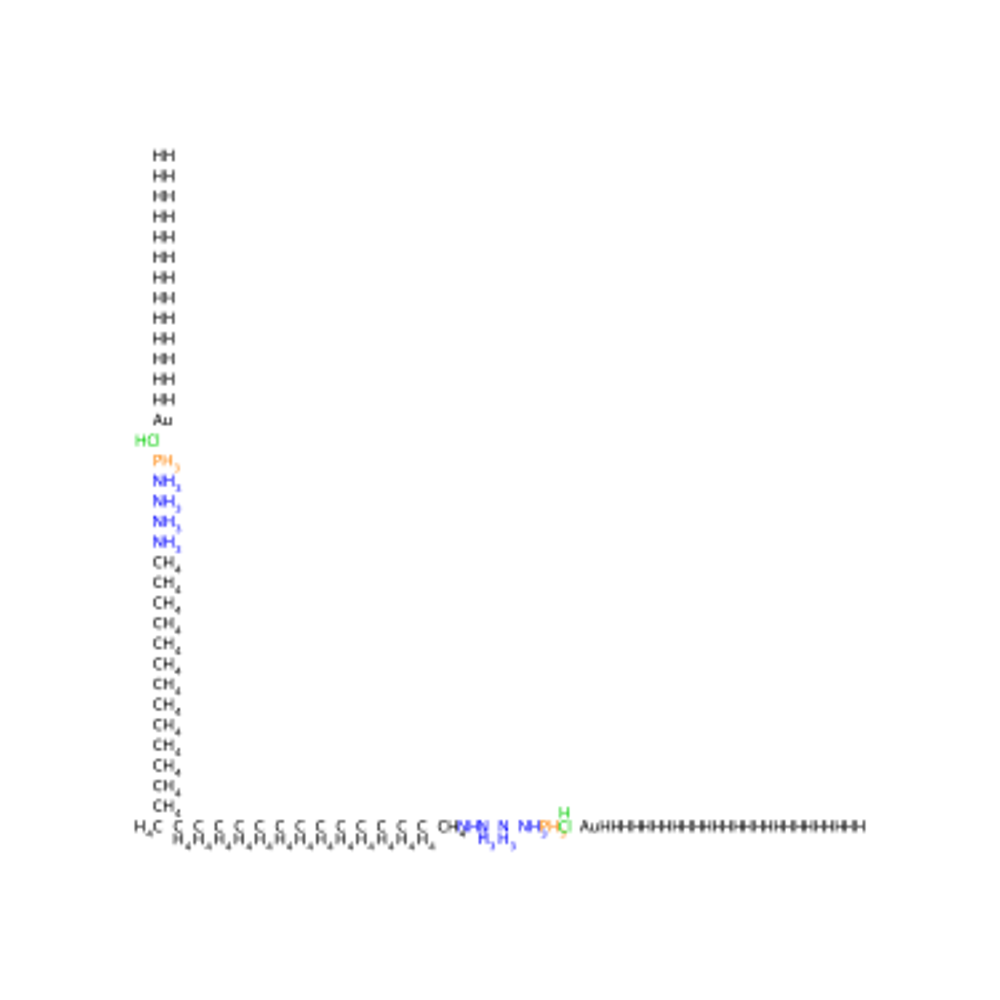


结构 30: frame_2_pyrimidine_0_ethane_0_SINGLE_benzene_0_5


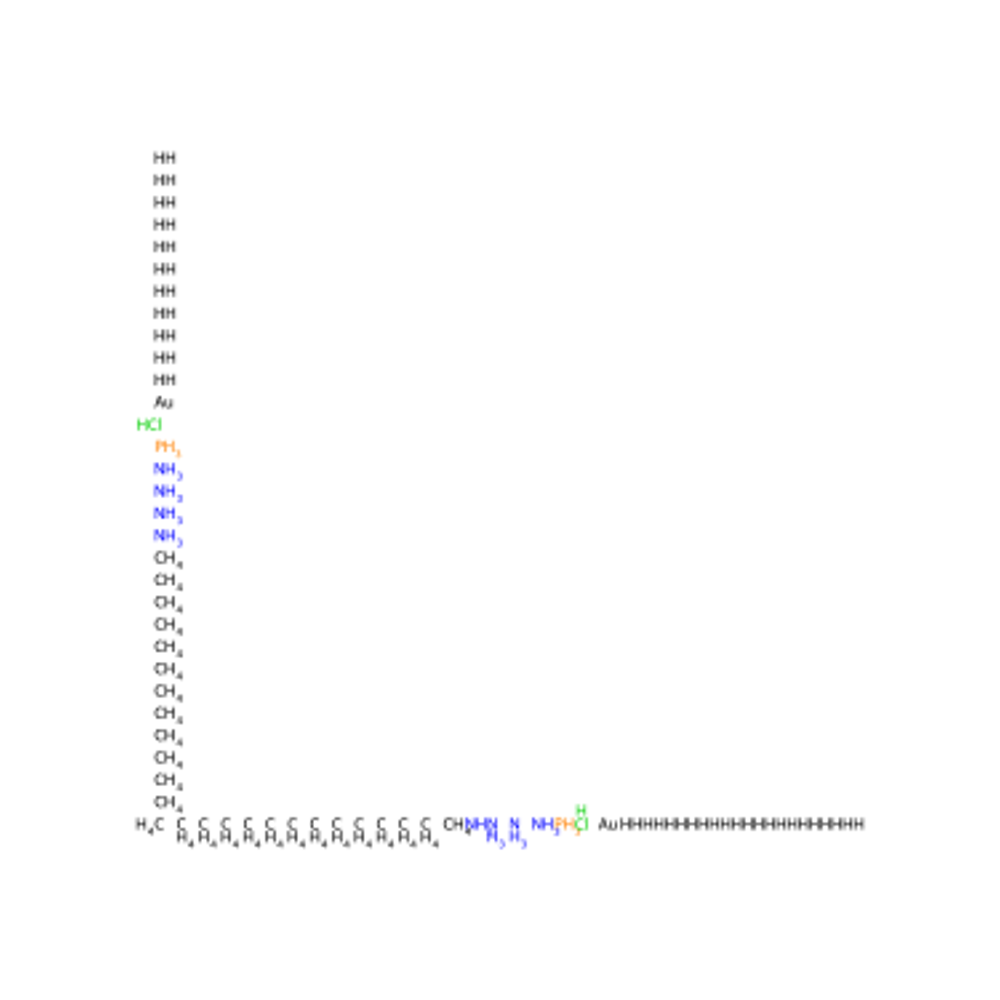


结构 31: frame_3_13-bis-trifluoromethyl-benzene_13_fluorane_0


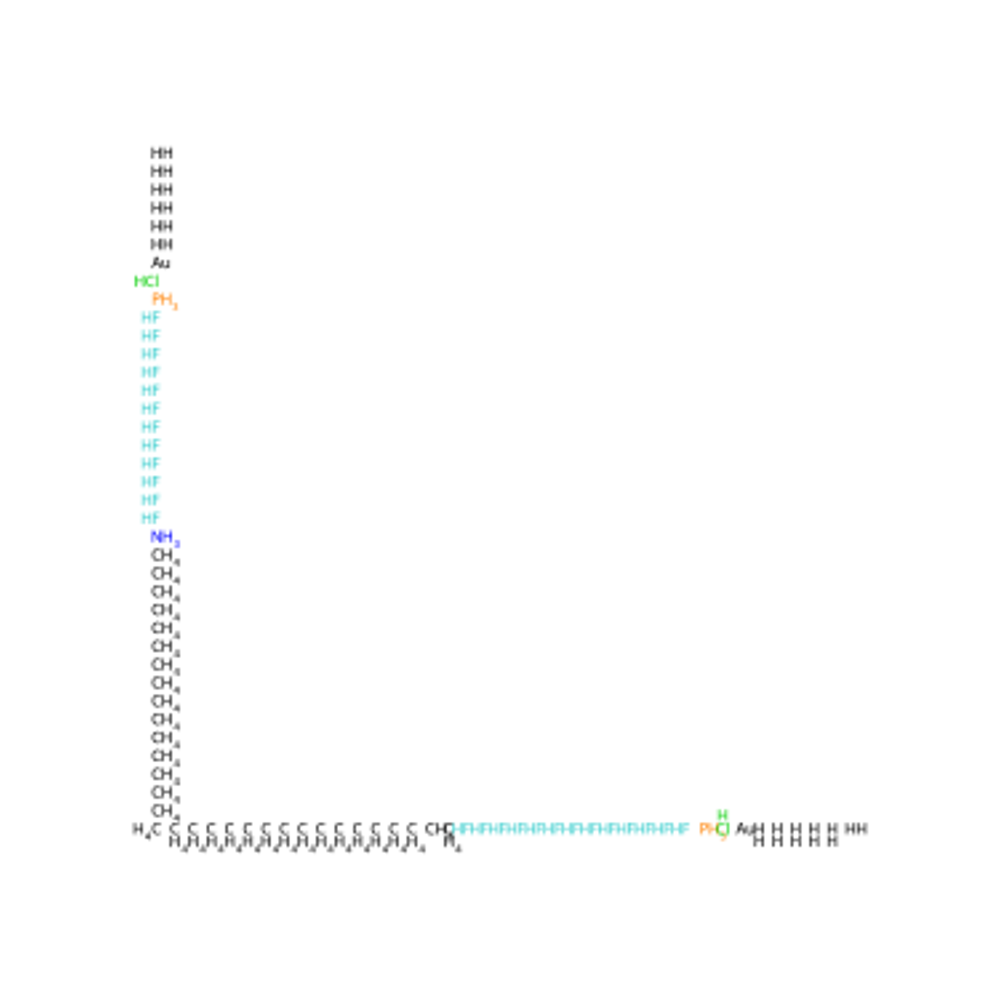


结构 32: frame_3_13-bis-trifluoromethyl-benzene_6_bromane_0


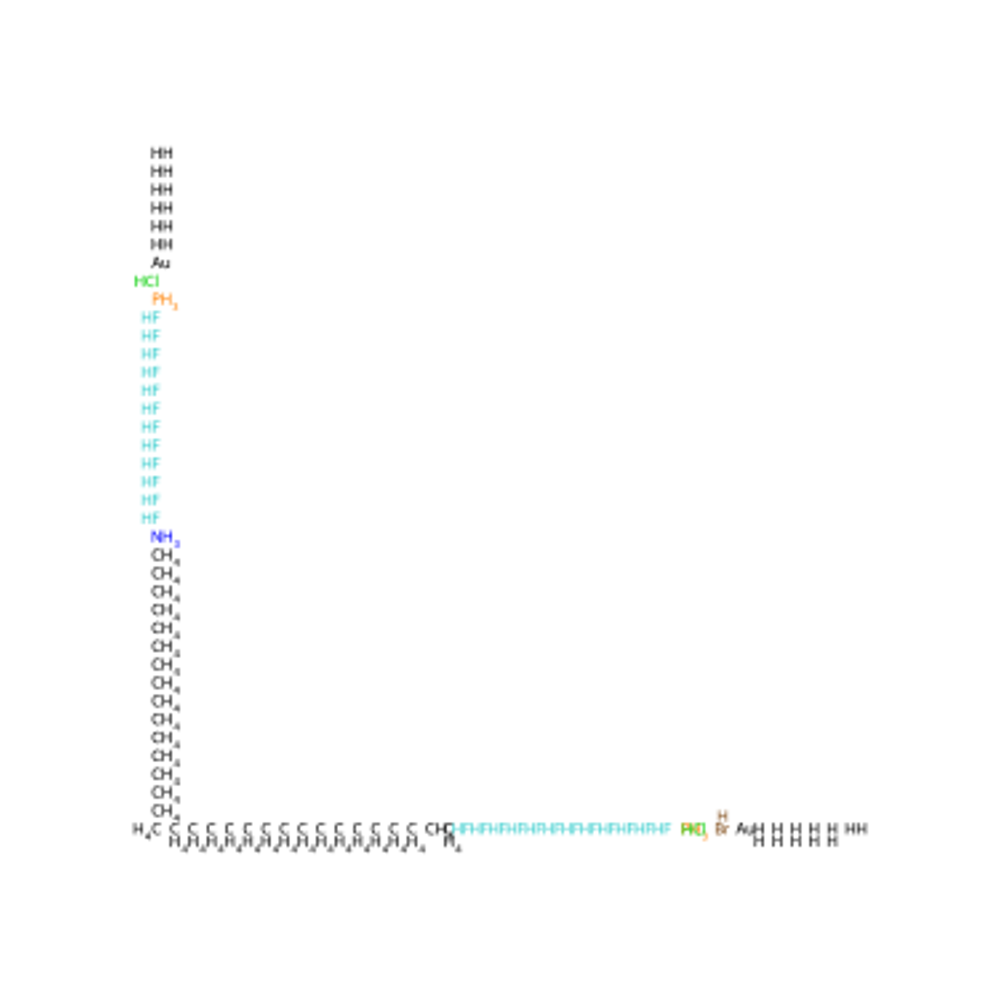


结构 33: frame_3_13-xylene_3_butane_0_SINGLE_methanol_0_4


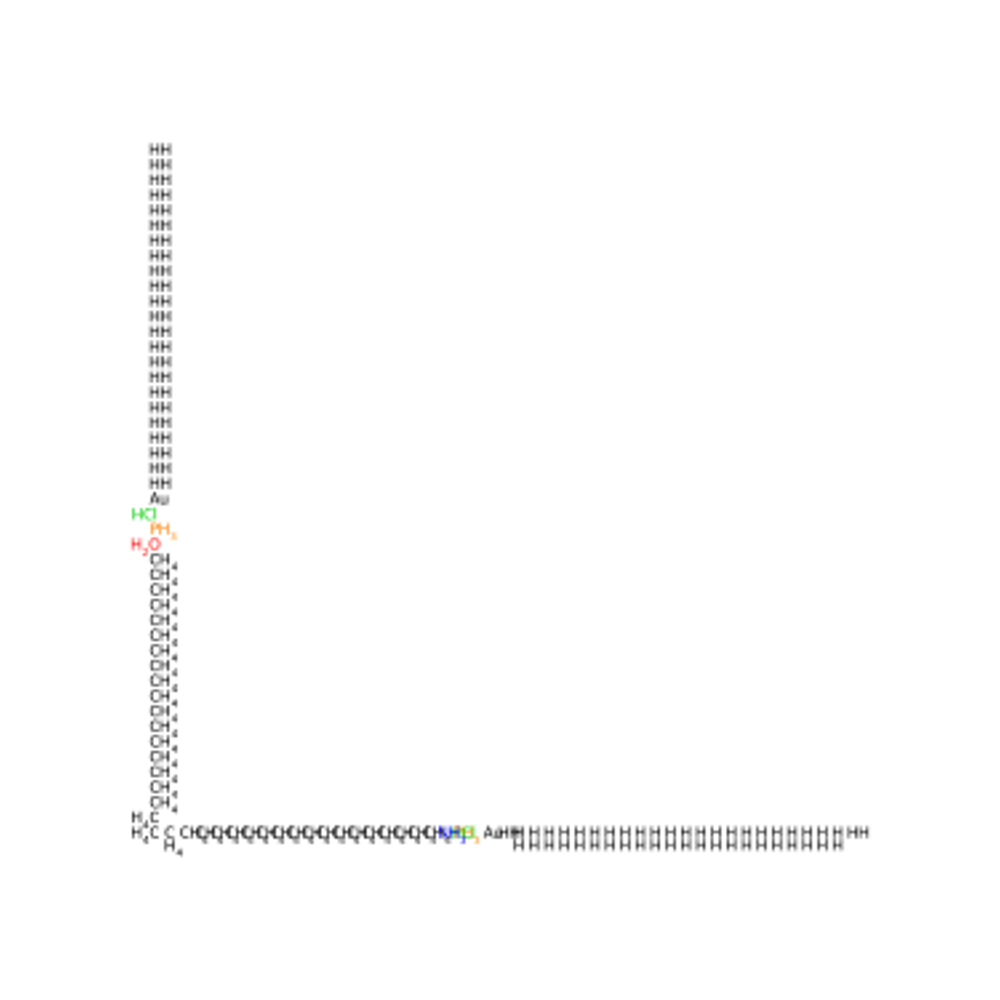


结构 34: frame_3_benzene_0_butane_0_SINGLE_azane_0_3


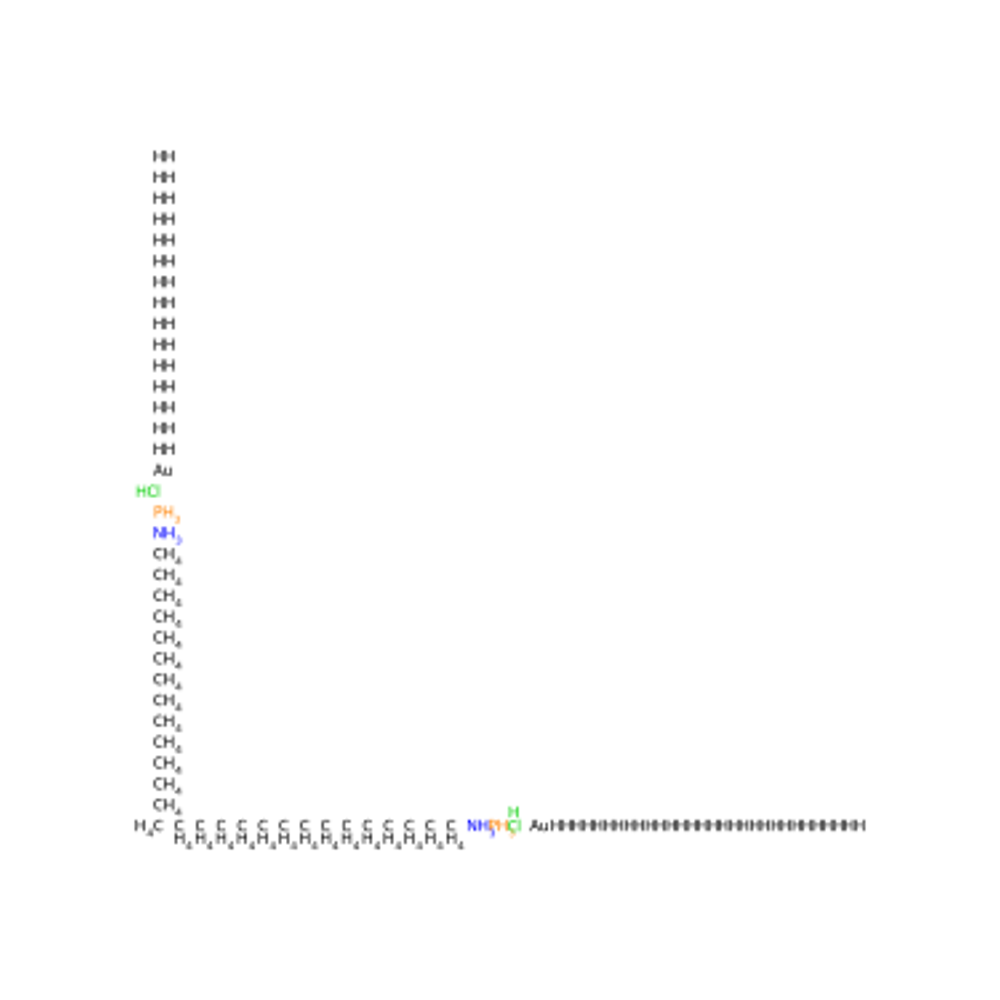


结构 35: frame_3_benzene_0_propane_1


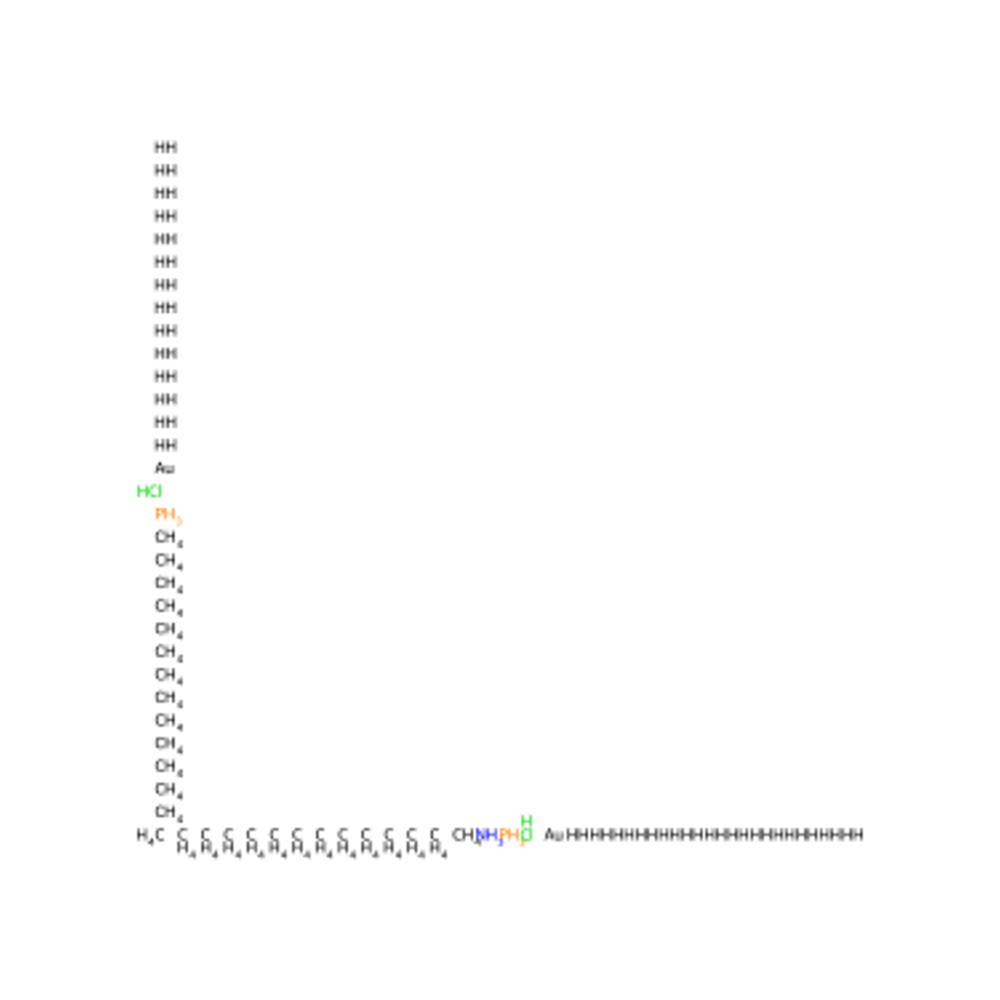


结构 36: frame_3_cyclobutane_0_butane_0_SINGLE_bromane_0_3


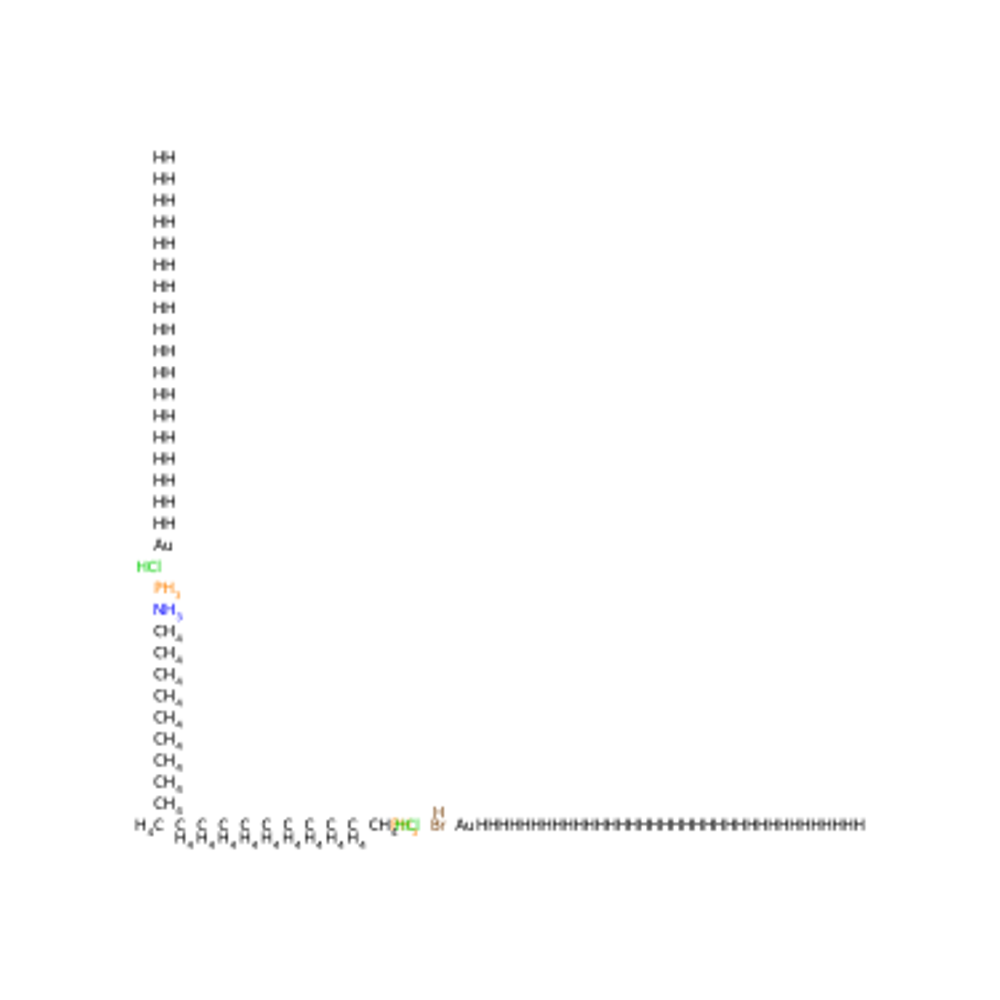


结构 37: frame_3_cyclopropane_0


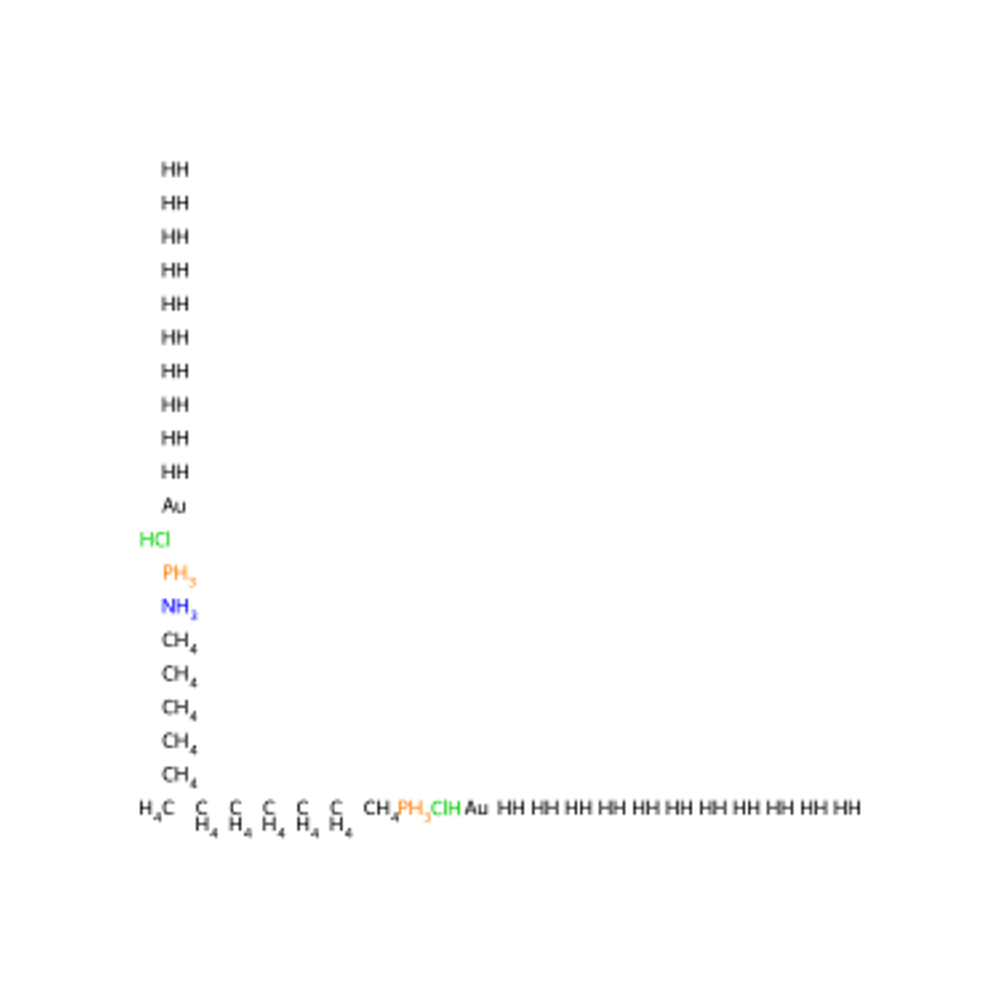


结构 38: frame_3_oxolane_2_butane_0_SINGLE_benzene_0_3


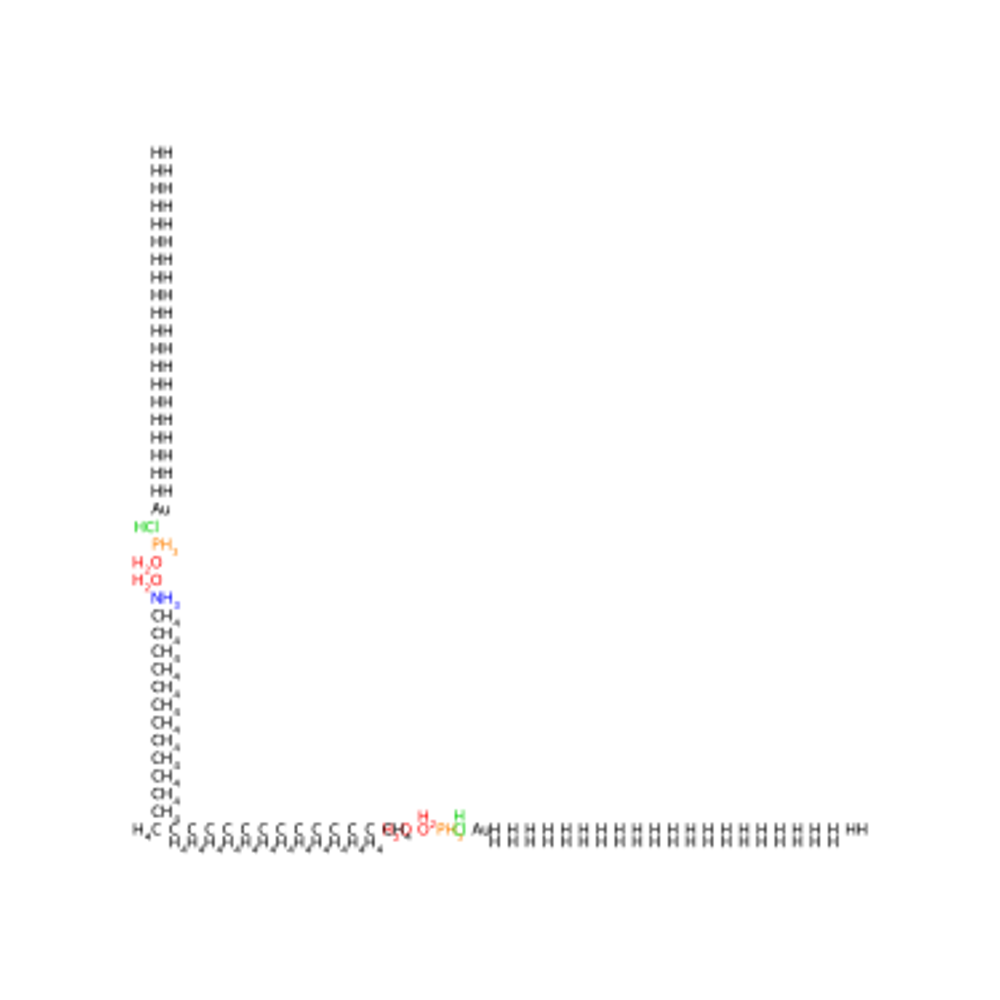


结构 39: frame_3_oxolane_2_propane_0_SINGLE_butane_0_2


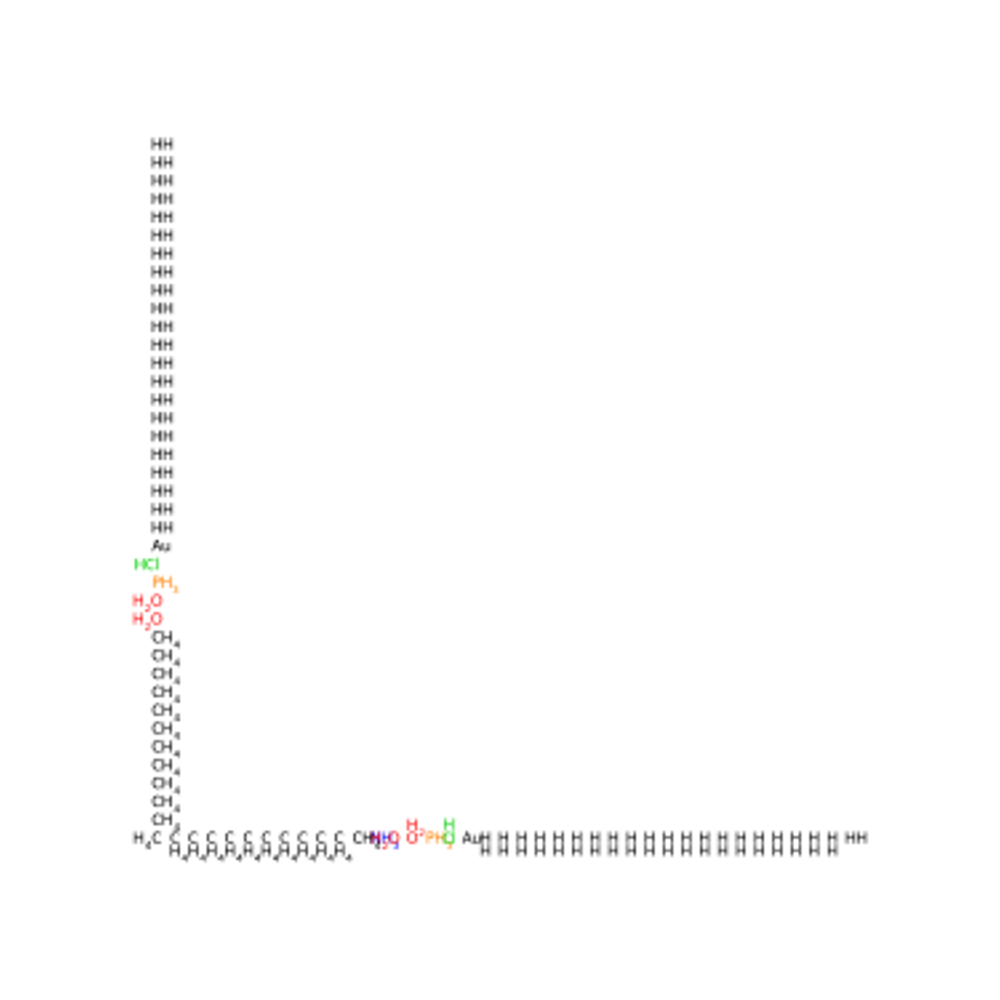


结构 40: frame_3_oxolane_2_propane_1_SINGLE_borane_0_0


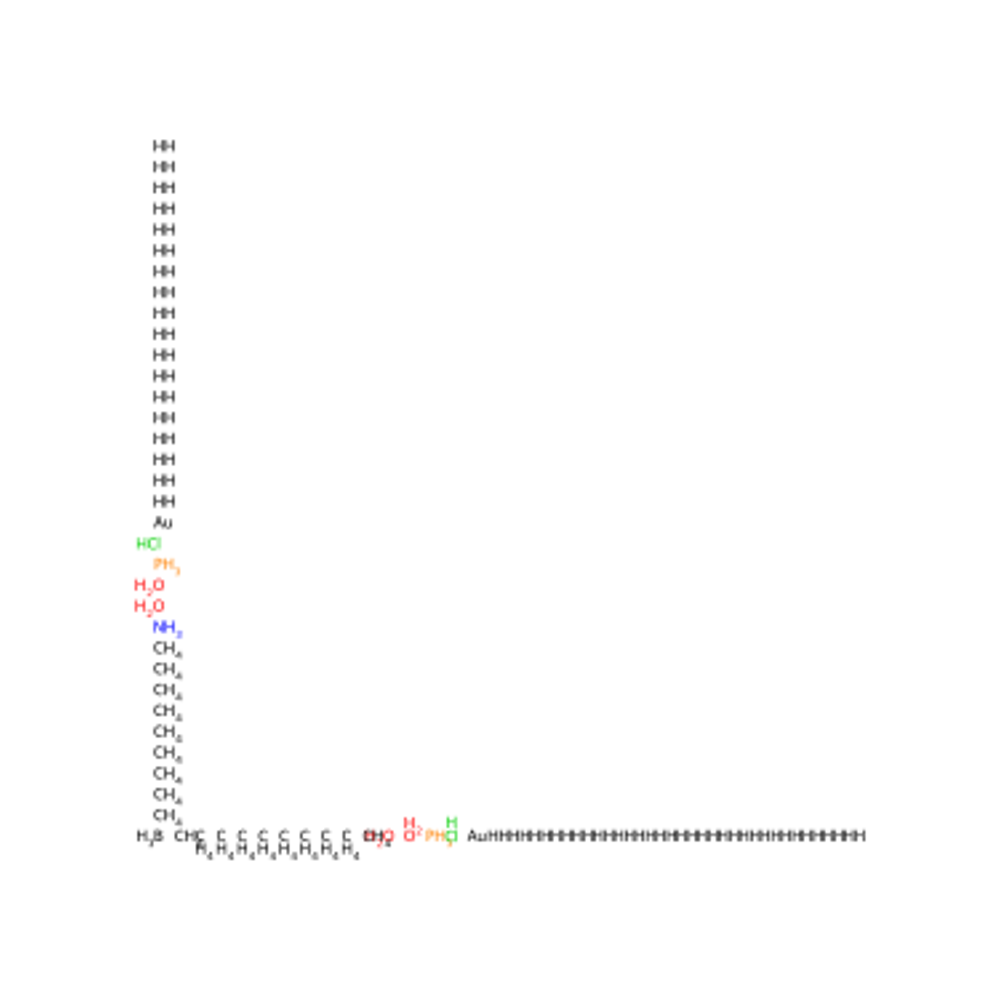


结构 41: frame_4_oxirane_0


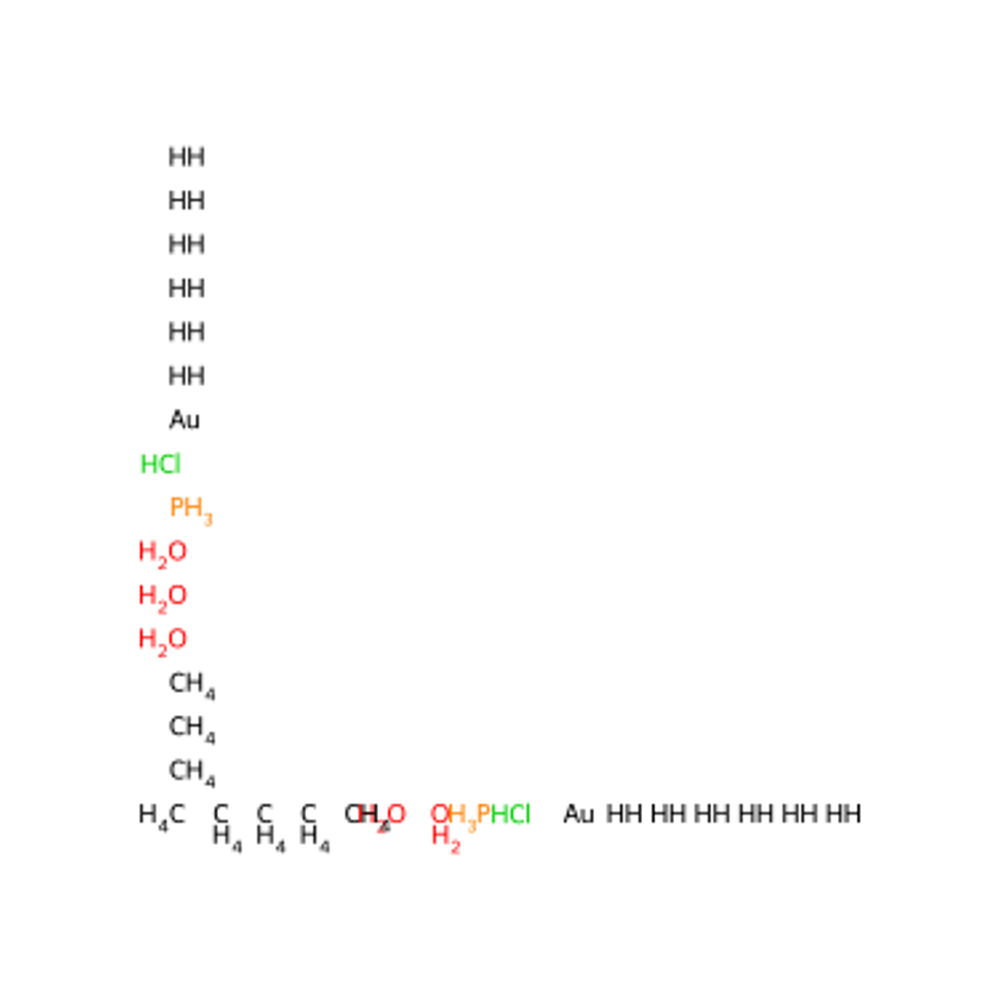


结构 42: frame_5_pyrazine_0


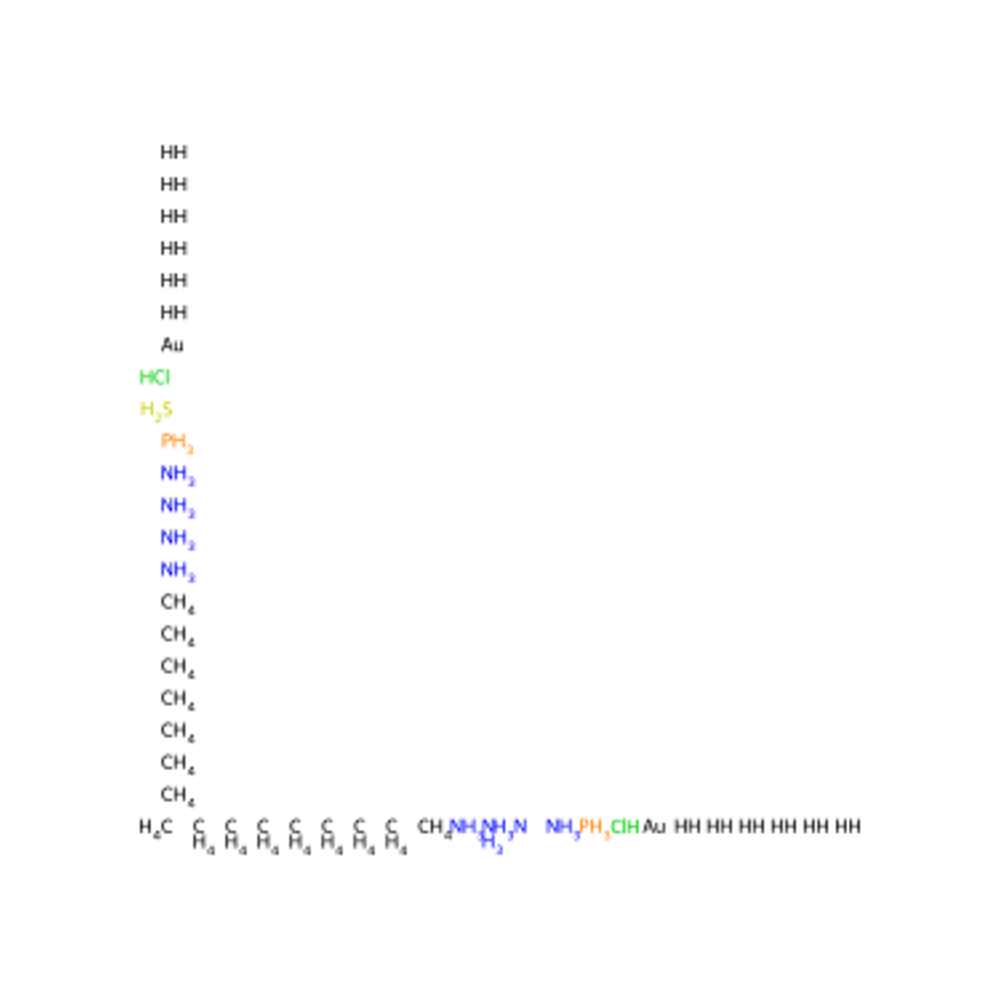

In [49]:
# 显示所有结构
for idx, row in df.iterrows():
    print(f"\n结构 {idx + 1}: {row['name']}")
    # 从base64字符串创建图片
    try:
        img_data = row['structure_image']
        # 确保我们只获取base64数据部分
        if ',' in img_data:
            img_data = img_data.split(',')[1]
        img_bytes = base64.b64decode(img_data)
        img = Image.open(BytesIO(img_bytes))
        
        # 转换为RGB模式（如果需要）
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        # 调整图片大小和方向
        img = img.resize((800, 800))  # 调整大小
        
        # 创建一个新的白色背景
        bg = Image.new('RGB', (1000, 1000), 'white')
        # 将图片粘贴到白色背景的中心
        bg.paste(img, ((1000 - 800) // 2, (1000 - 800) // 2))
        
        display(bg)
    except Exception as e:
        print(f"无法显示图片: {e}")
